#Feature Engineering

In [1]:
import os # Import the os module
file_path = './minimglearn.py' # Define the file path
if os.path.exists(file_path): # Check if the file exists
    os.remove(file_path) # Remove the file
    print(f'{file_path} has been erased.') # Print that the file has been erased
else:
    print(f'{file_path} does not exist.') # Print that the file does not exist

!wget https://raw.githubusercontent.com/profandresg/maquinaprendiz/master/minimglearn.py # Download the minimglearn.py file from GitHub
import minimglearn # Import the minimglearn module
from minimglearn import cm_cycle, cm3, cm2, cdict, ReBl # Import specific functions and variables from minimglearn
from minimglearn import make_wave # Import make_forge function from minimglearn
from minimglearn import plot_2d_separator, discrete_scatter # Import plot_2d_separator and discrete_scatter functions from minimglearn
from minimglearn import plot_2d_classification # Import plot_2d_classification function from minimglearn
from minimglearn import heatmap, plot_kmeans_boundaries, plot_dbscan

import numpy as np # Import numpy module

./minimglearn.py has been erased.
--2023-05-04 21:29:01--  https://raw.githubusercontent.com/profandresg/maquinaprendiz/master/minimglearn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11805 (12K) [text/plain]
Saving to: ‘minimglearn.py’

minimglearn.py      100%[===================>]  11.53K  --.-KB/s    in 0s      

2023-05-04 21:29:01 (33.8 MB/s) - ‘minimglearn.py’ saved [11805/11805]



#Feature Augmentation

##Binning (Discretization)

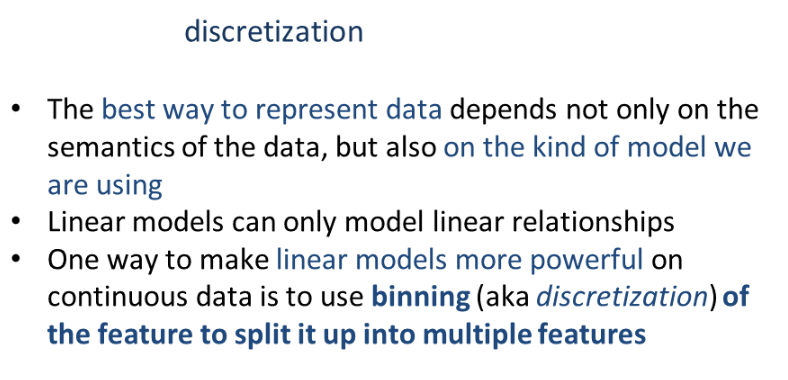

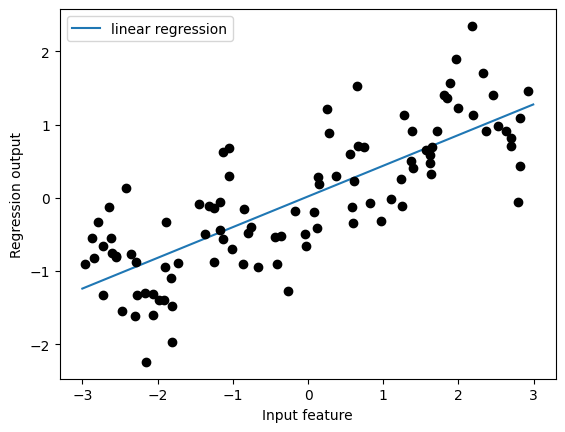

In [2]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

X, y = make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

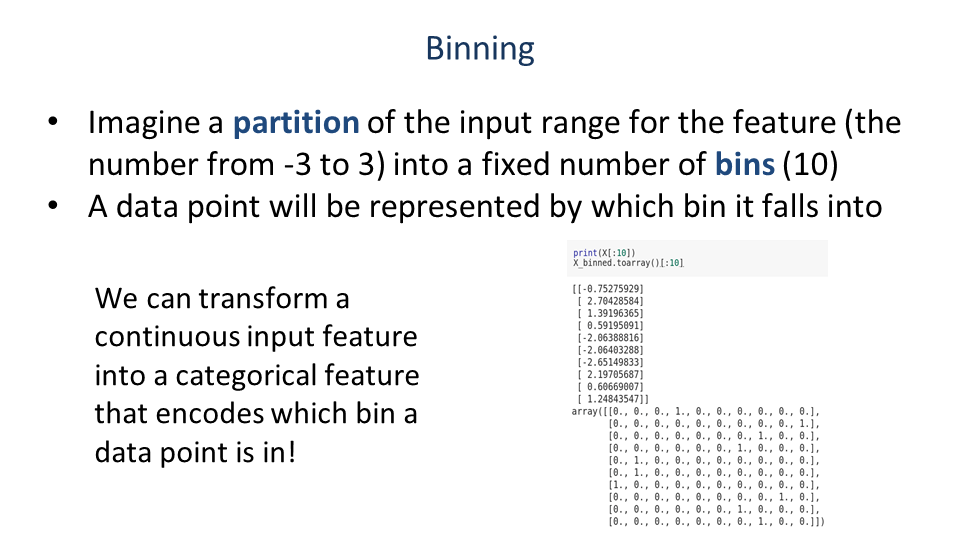

In [3]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [4]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [5]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
line_binned = encoder.transform(np.digitize(line, bins=bins))
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
print("X_binned.shape: {}".format(X_binned.shape))
print("line_binned.shape: {}".format(line_binned.shape))

X_binned.shape: (100, 10)
line_binned.shape: (1000, 10)


Text(0.5, 0, 'Input feature')

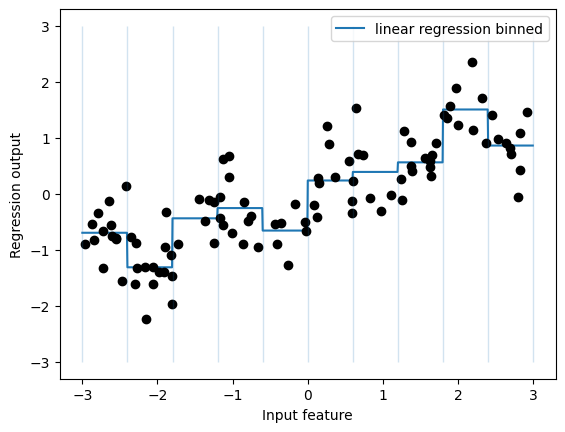

In [7]:
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

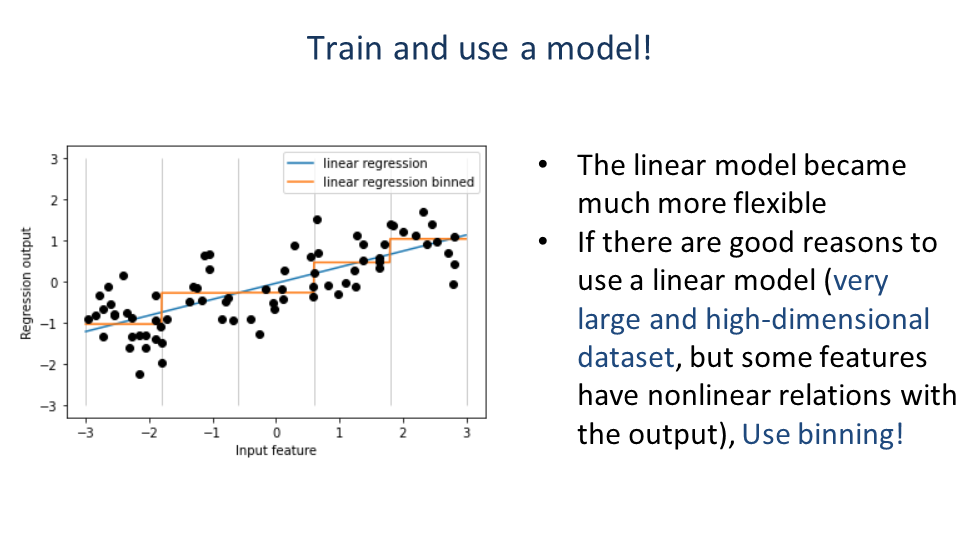

##Interactions

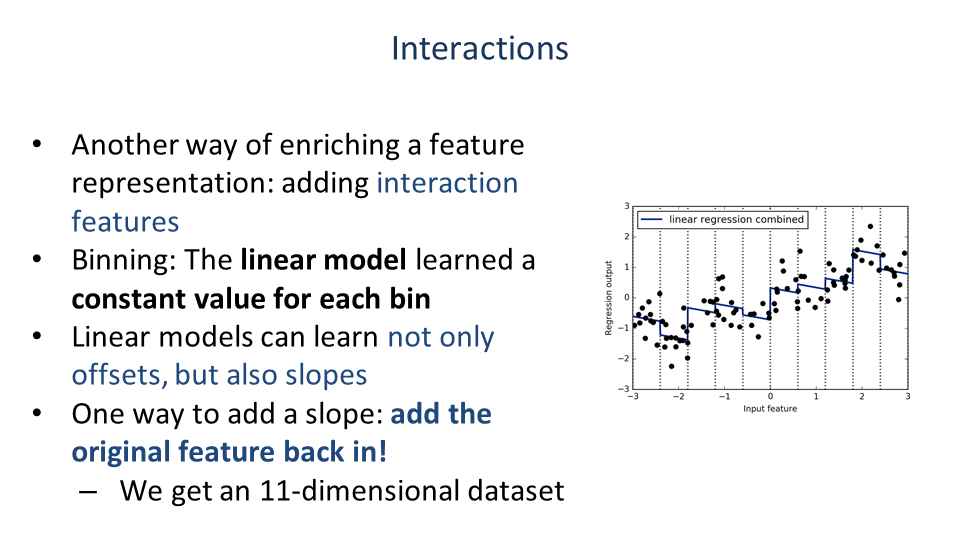

In [8]:
X_combined = np.hstack([X, X_binned])
line_combined = np.hstack([line, line_binned])
print(X_combined.shape)

(100, 11)


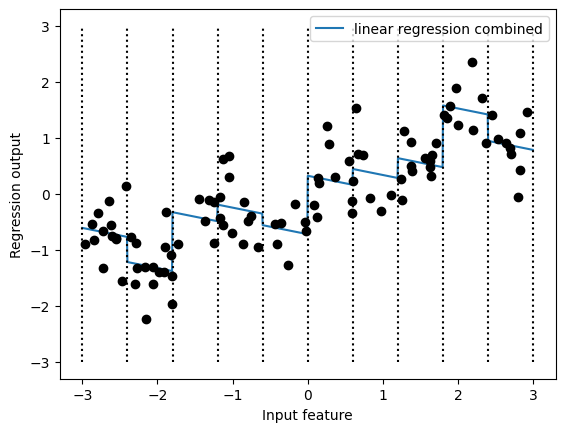

In [9]:
reg = LinearRegression().fit(X_combined, y)

plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

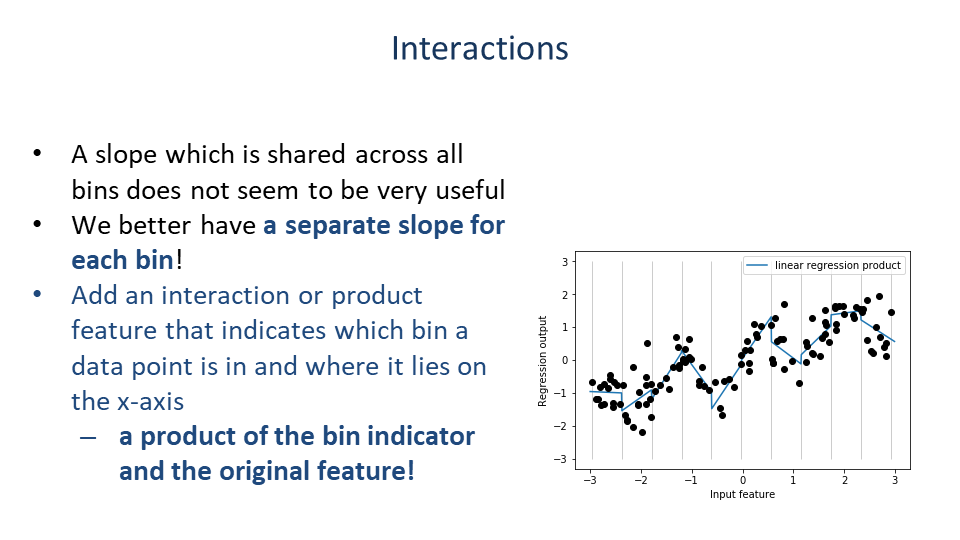

In [10]:
X_product = np.hstack([X_binned, X * X_binned])
line_product = np.hstack([line_binned, line * line_binned])
print(X_product.shape)

(100, 20)


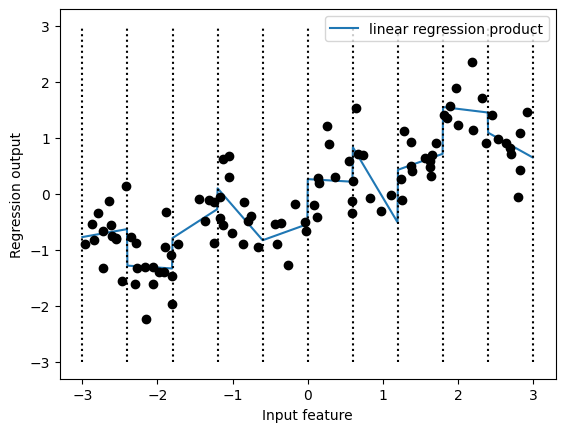

In [11]:
reg = LinearRegression().fit(X_product, y)
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

#Feature Selection

## Univariate Statistics

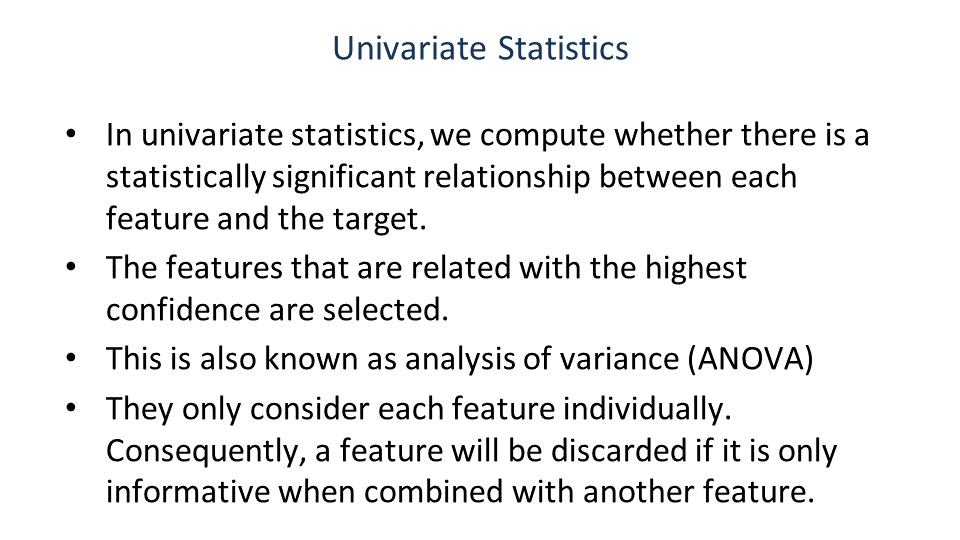

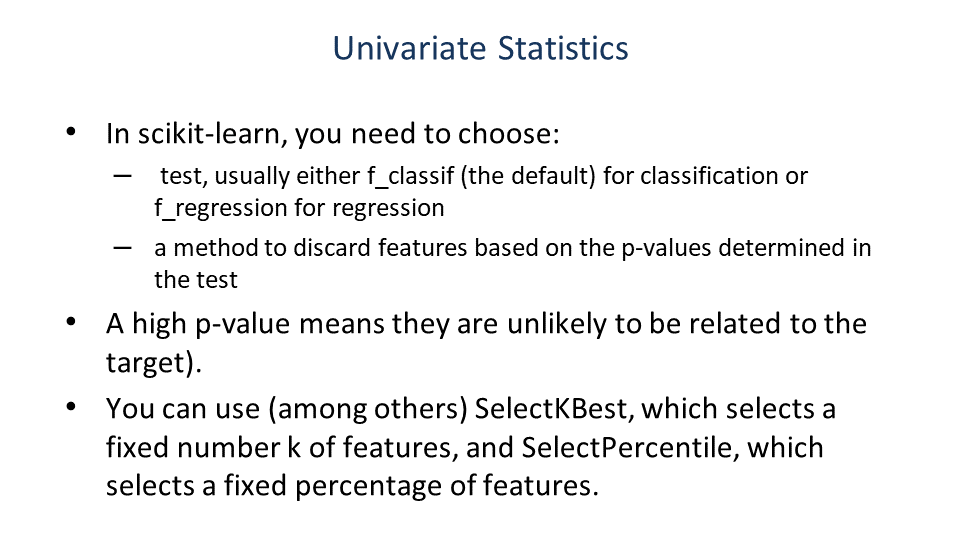

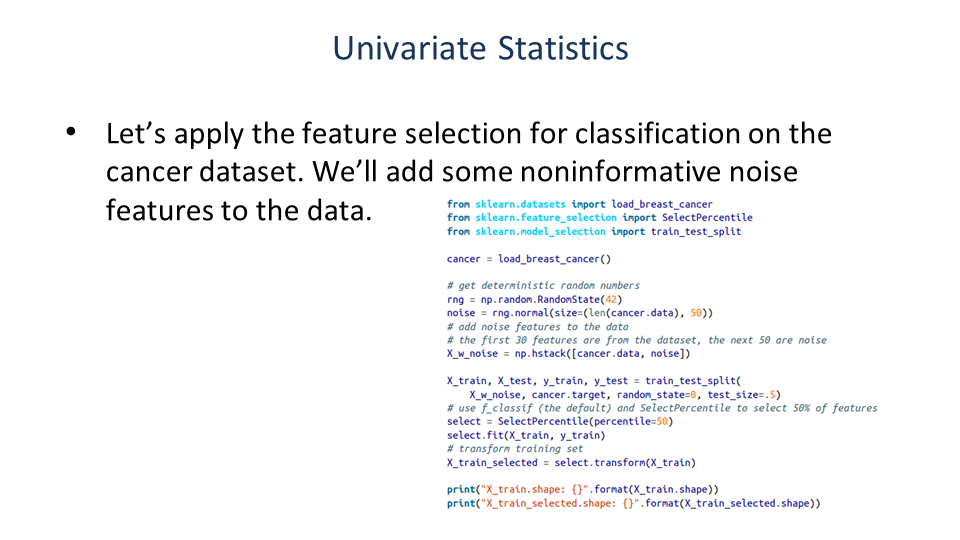

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=5)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 4)


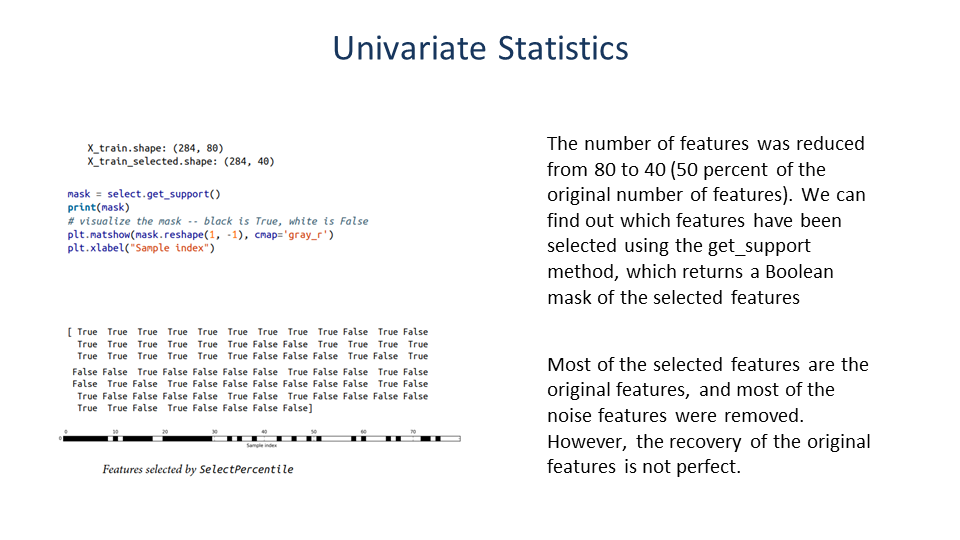

[False False False False False False False  True False False False False
 False False False False False False False False  True False  True False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


Text(0.5, 0, 'Sample index')

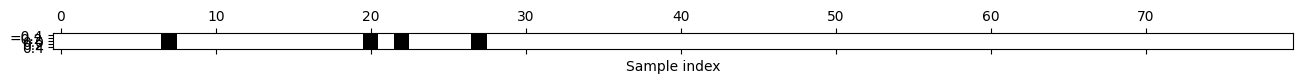

In [13]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

[2.87891478e+02 4.75857903e+01 3.10612785e+02 2.41276462e+02
 4.52640733e+01 1.69963025e+02 2.76369205e+02 4.42910141e+02
 3.53148760e+01 2.48339844e-01 1.14278701e+02 5.70579214e-01
 1.06724322e+02 9.10220232e+01 1.86834578e+00 1.68338460e+01
 9.09124140e+00 3.83019556e+01 2.14960839e-02 1.94090779e-01
 3.88608198e+02 6.36227382e+01 4.00380697e+02 2.81097472e+02
 7.08022342e+01 1.59204990e+02 2.42056413e+02 5.53000131e+02
 6.62873083e+01 3.03266462e+01 5.09796742e-01 2.19965073e-01
 2.81054688e-02 3.77480895e+00 5.89522779e-01 3.71661971e+00
 1.90263601e-02 2.01804626e-01 2.28670543e+00 4.46951210e-01
 7.81244165e-02 1.83974939e-01 5.60230622e-02 4.18386150e+00
 1.52965820e-01 3.77887289e-01 1.55740225e+00 1.41335016e+00
 1.30242498e-01 1.58331787e+00 8.81957793e-02 3.95307725e+00
 7.68258256e-02 1.10879240e+00 1.11481877e-02 3.55975928e-01
 2.16015641e-01 6.45761425e-01 3.05437654e+00 2.21520013e-01
 3.92860873e+00 8.15884138e-02 5.81255747e-01 1.20172727e+00
 2.04043714e-01 2.202537

<Axes: >

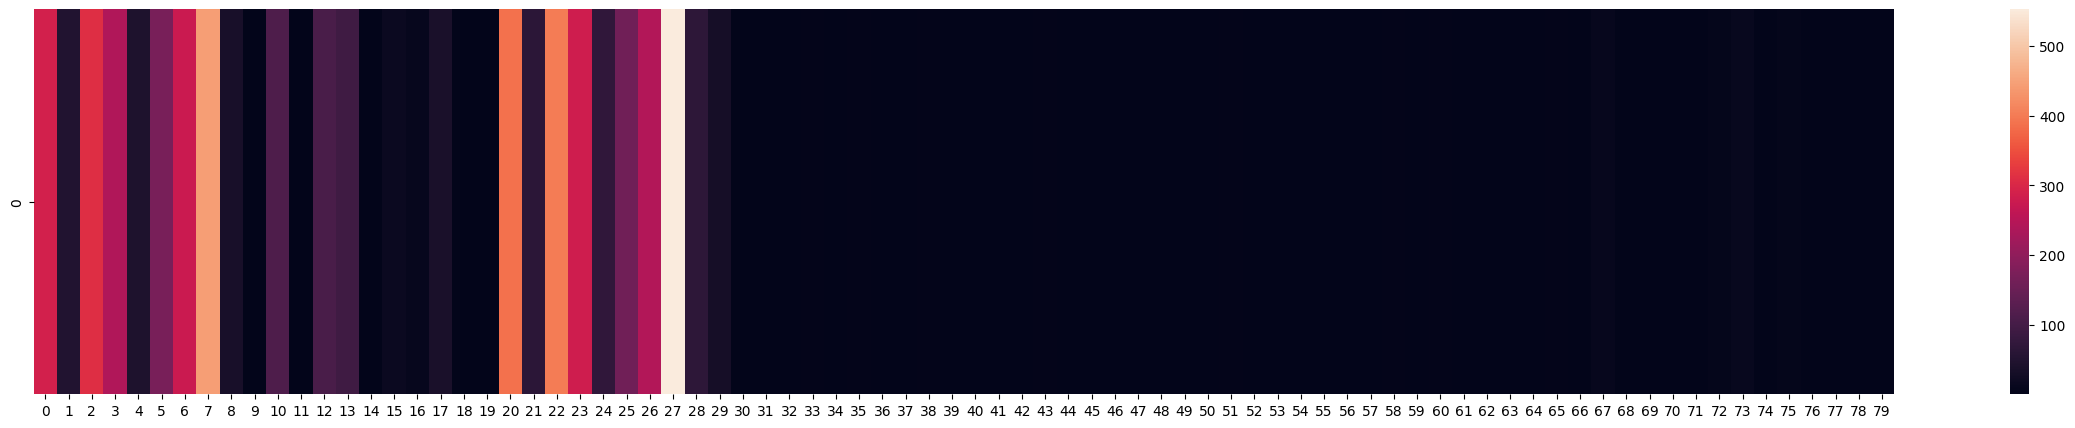

In [14]:
import pandas as pd
plt.rcParams['figure.figsize'] = [30,5]
import seaborn as sns
print(select.scores_)
sns.heatmap(pd.DataFrame(select.scores_).transpose())

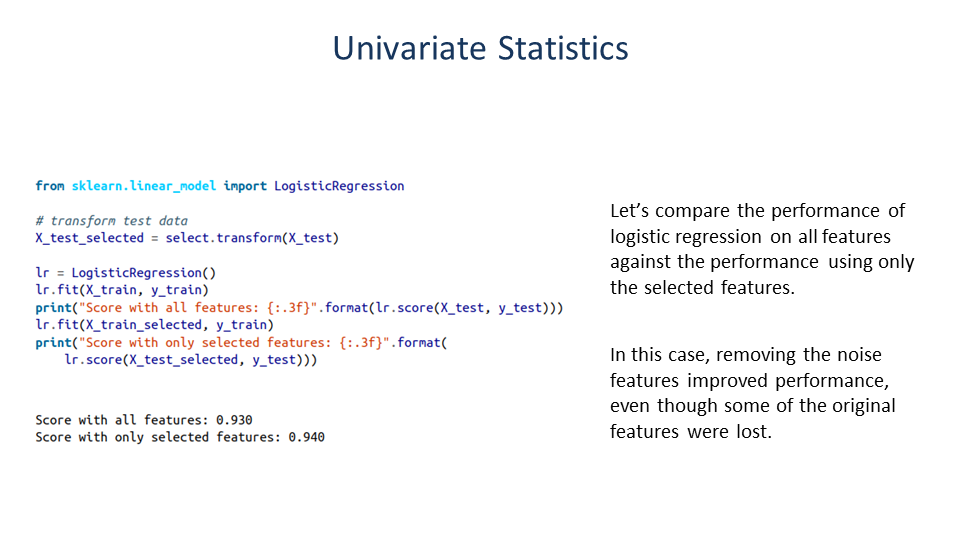

In [15]:
from sklearn.linear_model import LogisticRegression
# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.947
Score with only selected features: 0.926


## Model-Based Feature Selection

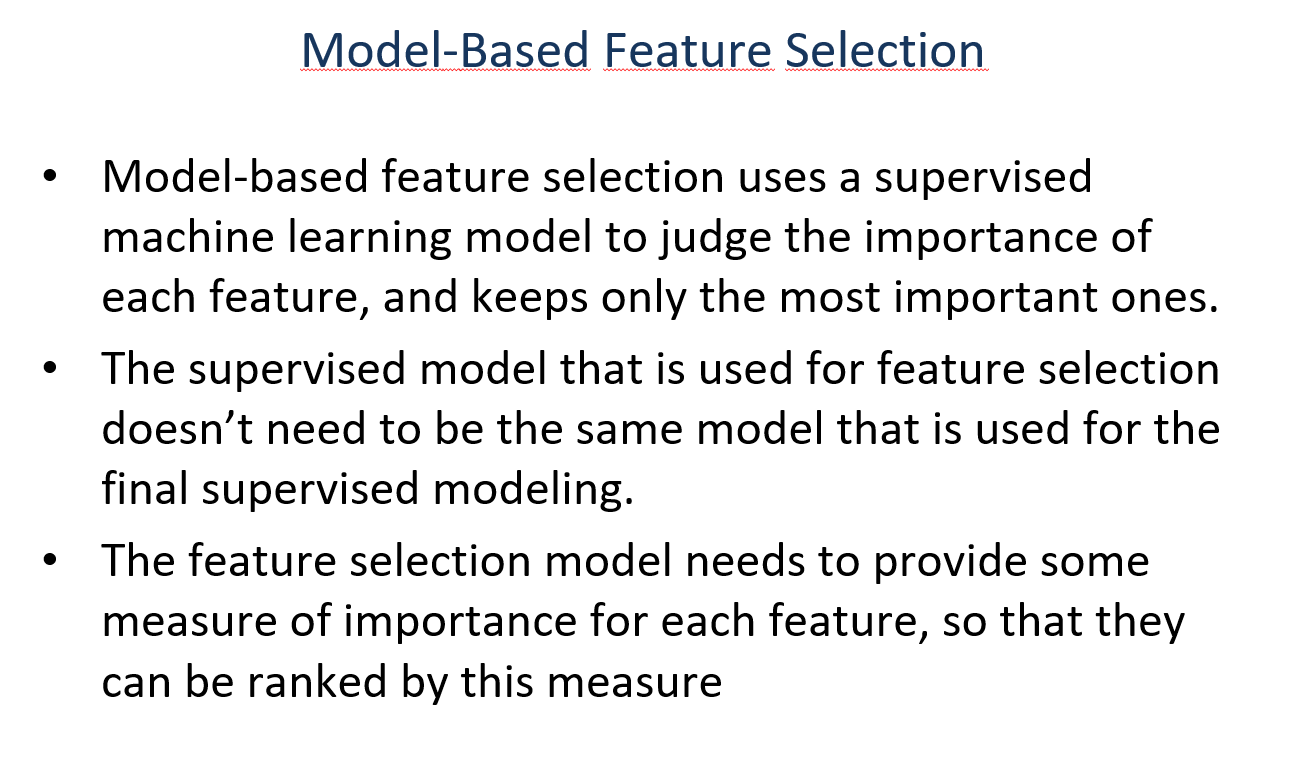

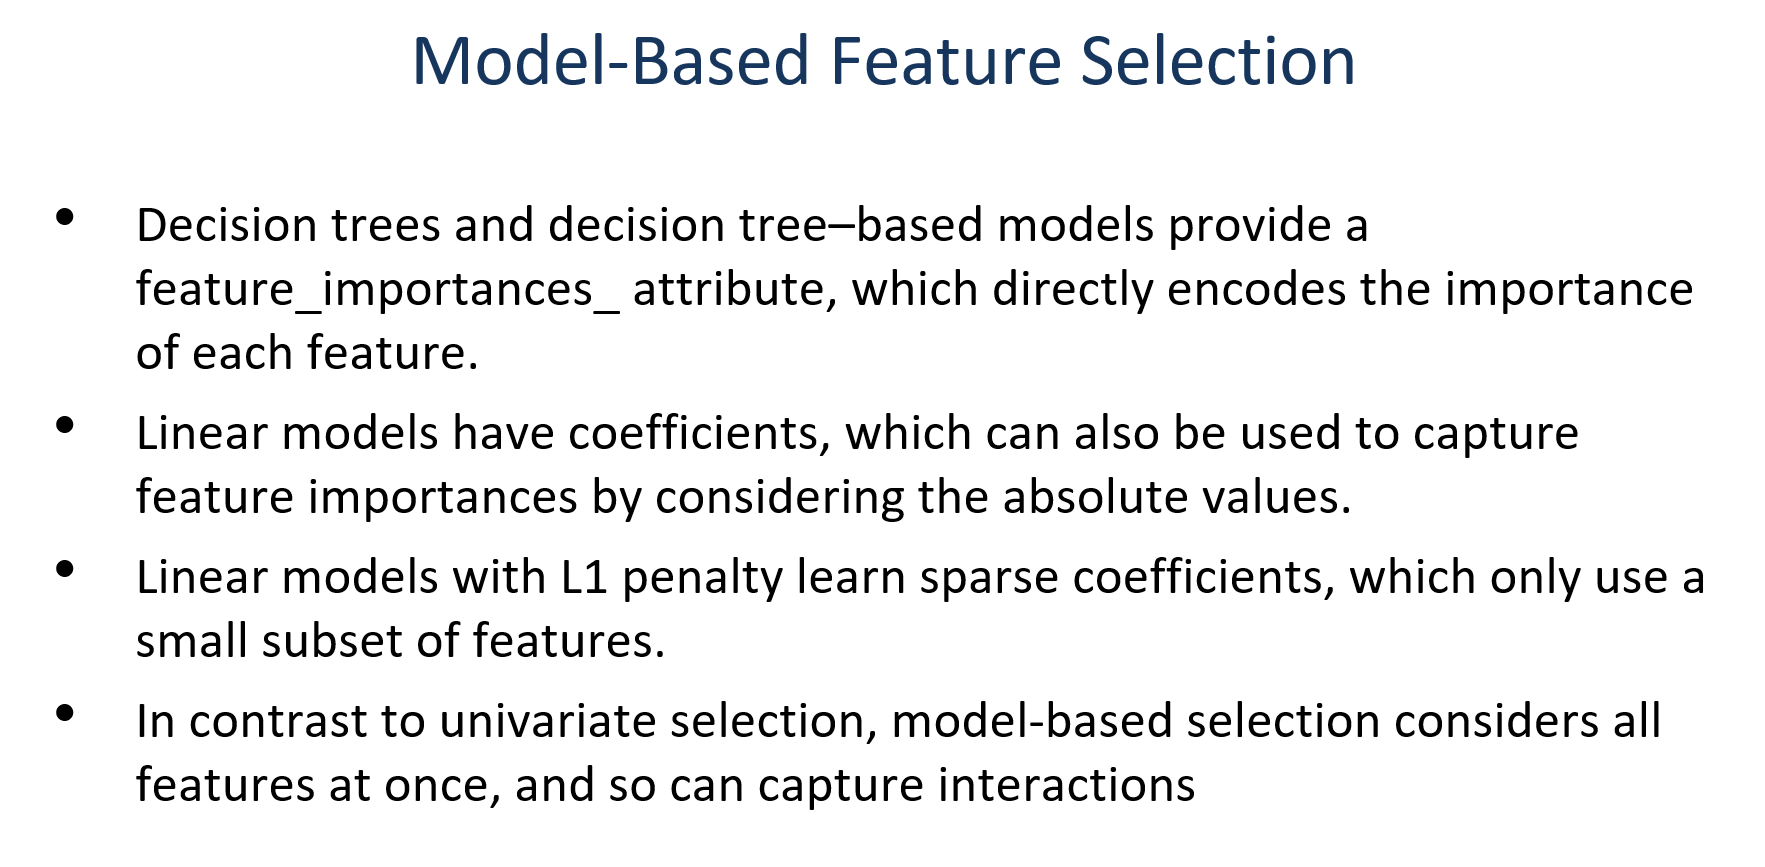

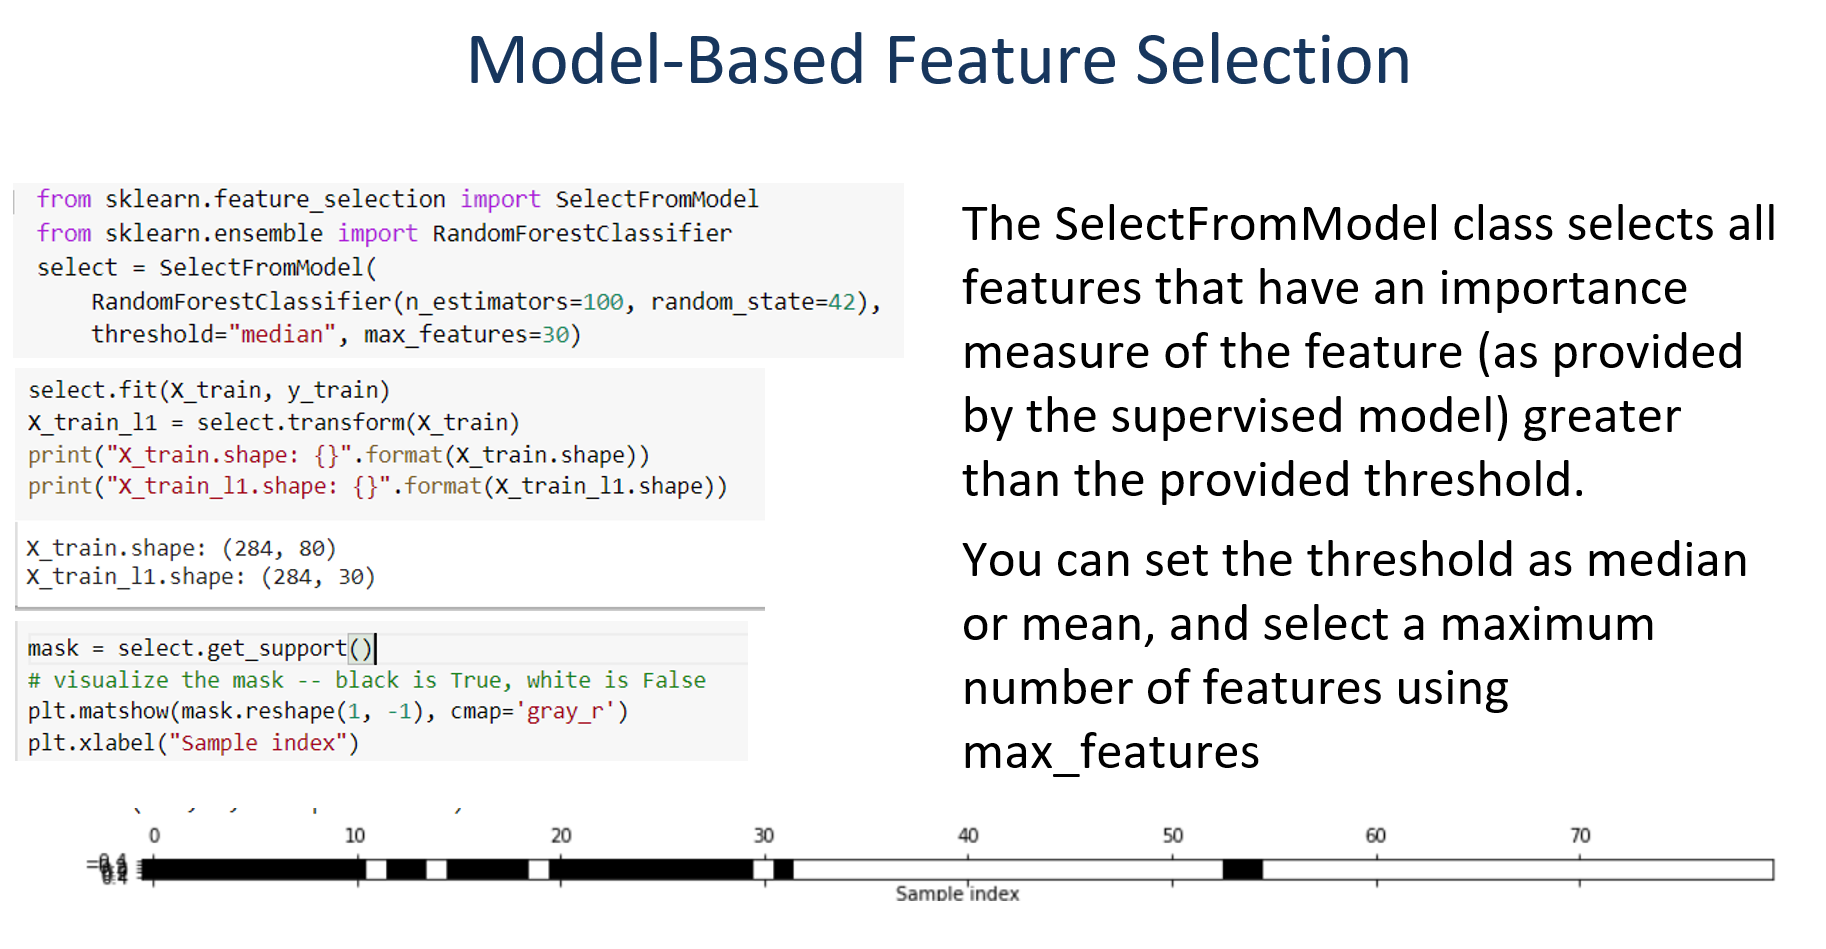

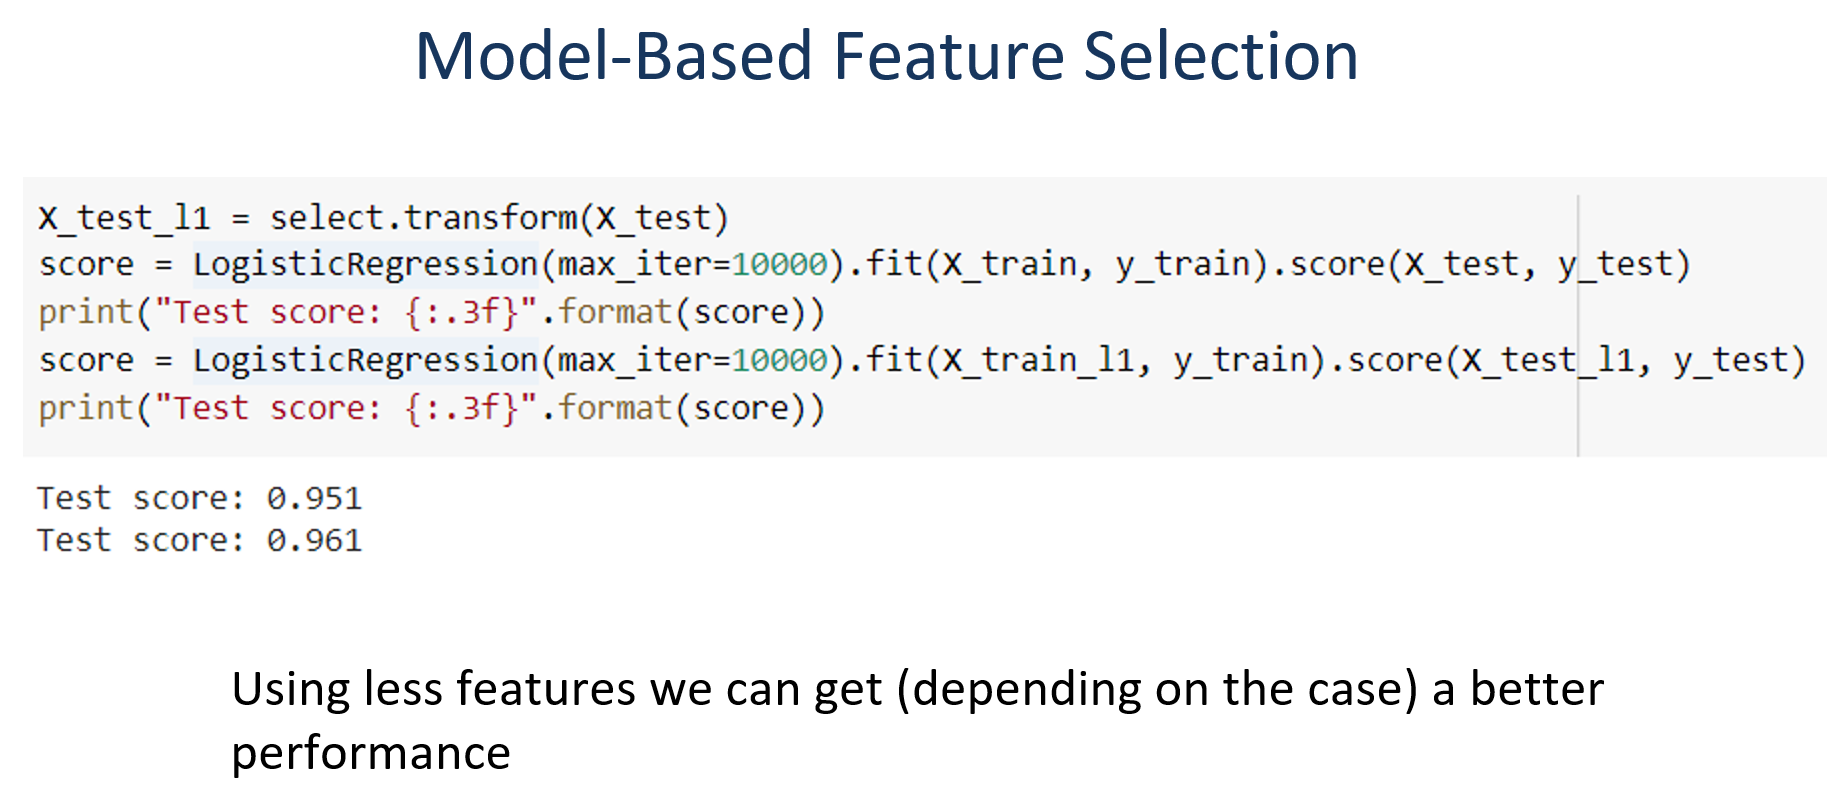

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifier


select = SelectFromModel(RidgeClassifier(alpha=1),threshold="median", max_features=80)

In [17]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

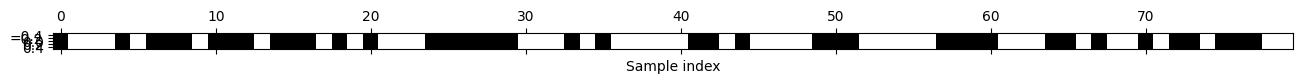

In [18]:
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

[[ 1.70597121e-01  1.10838975e-02  3.20798572e-03 -9.72155750e-04
  -1.17095173e-01  2.75212609e-02 -3.31050032e-01 -3.16570045e-01
  -2.82234451e-01  7.45441498e-03 -2.54501245e-01 -1.77142260e-01
   1.19958184e-01 -5.49717303e-03 -3.75638441e-02  1.13742749e-01
   2.61718833e-01 -1.69721044e-02 -8.52977546e-02  2.75476522e-02
  -4.87864686e-01 -2.16837742e-02 -6.56317878e-03  3.15968743e-03
  -3.20010825e-01 -1.26541695e-01 -8.12296719e-01 -6.37521477e-01
  -6.14326562e-01 -7.34872655e-02 -2.65626547e-02  1.93565279e-02
   2.79180422e-02  7.97950536e-02  1.08721849e-02  2.92616300e-02
  -3.62640387e-05  2.19340401e-02 -2.32029496e-02  5.13843430e-03
   6.27241636e-03 -2.85259405e-02 -2.95465676e-02 -1.71053881e-02
  -7.38319827e-02  2.41537248e-03 -2.51143313e-02  1.20666633e-02
   9.88626844e-03 -4.86627634e-02 -3.50493585e-02  4.16005545e-02
  -1.16796639e-02 -1.60476941e-02  1.80928016e-02  4.55173549e-03
  -2.83516611e-02 -3.95593600e-02  5.40569162e-02  3.16829727e-02
   3.87948

<Axes: >

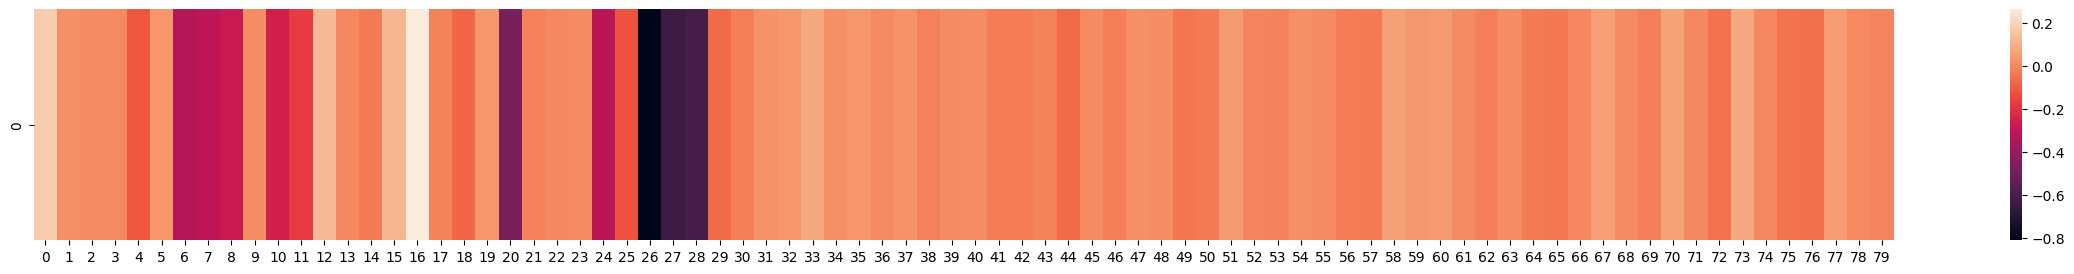

In [19]:
plt.rcParams['figure.figsize'] = [30,3]
print(select.estimator_.coef_)
sns.heatmap(pd.DataFrame(select.estimator_.coef_))

In [20]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))
score = LogisticRegression(max_iter=10000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.947
Test score: 0.951


##Iterative Feature Selection

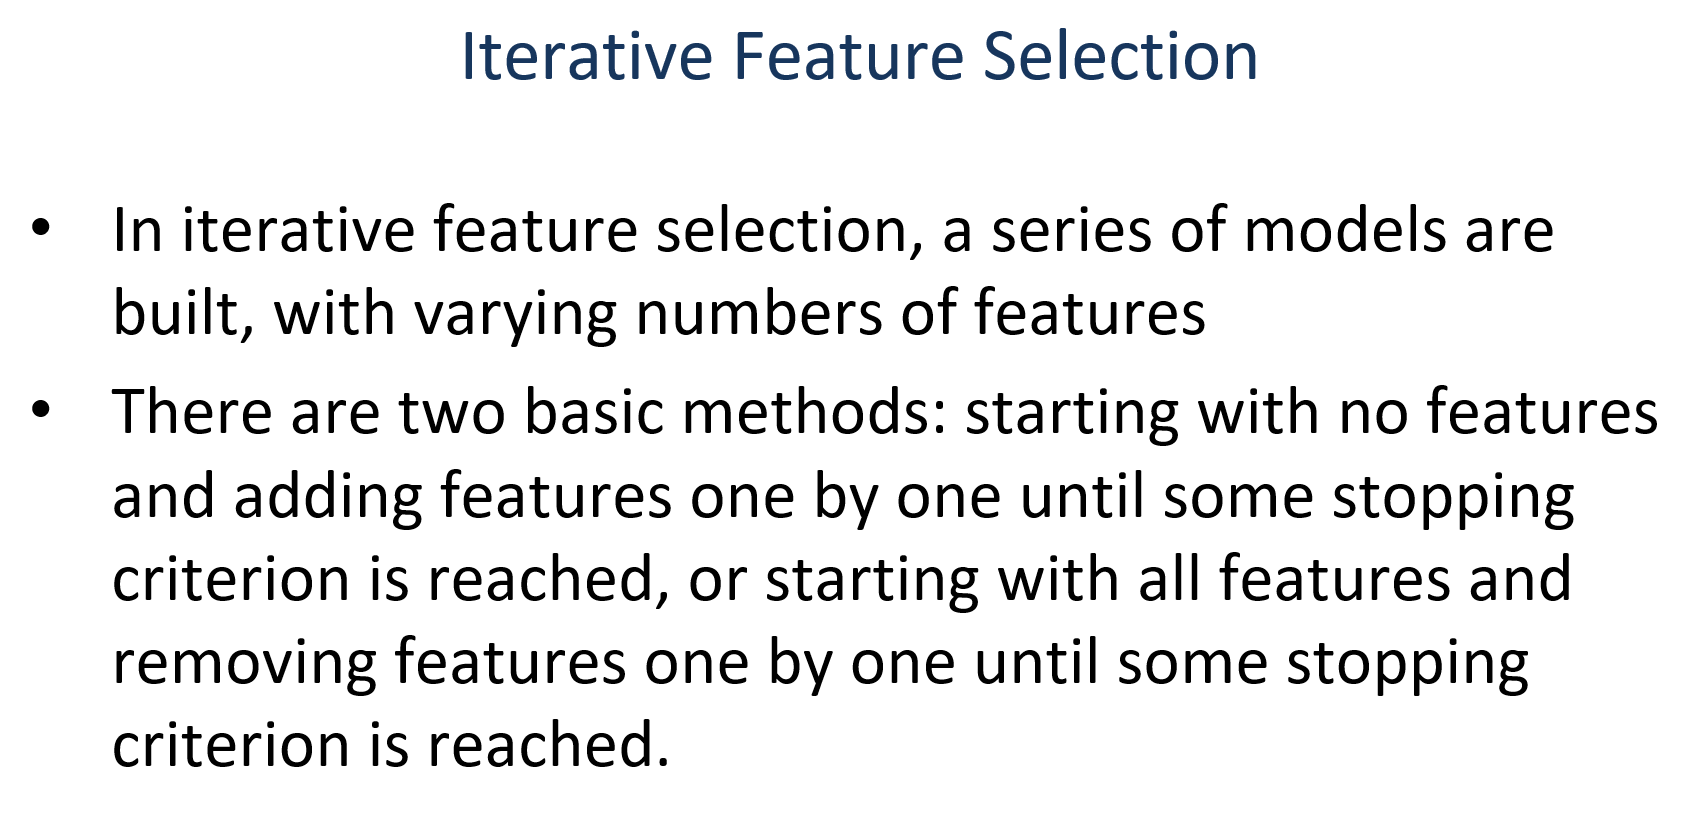

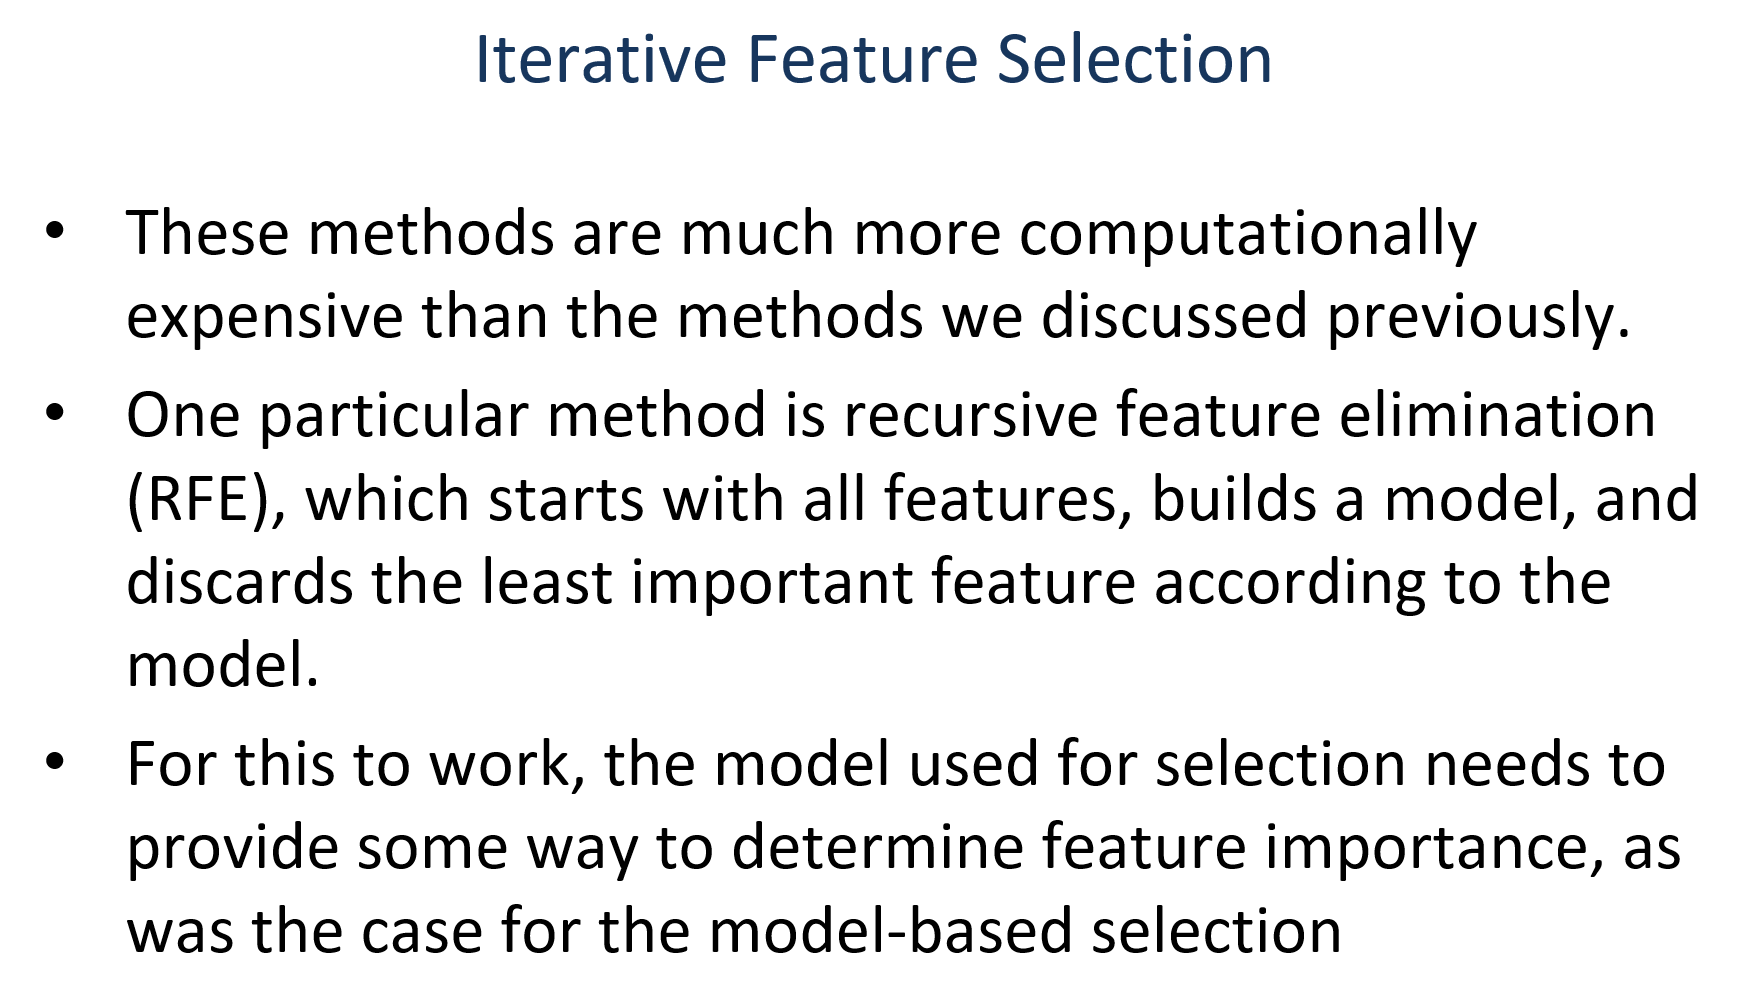

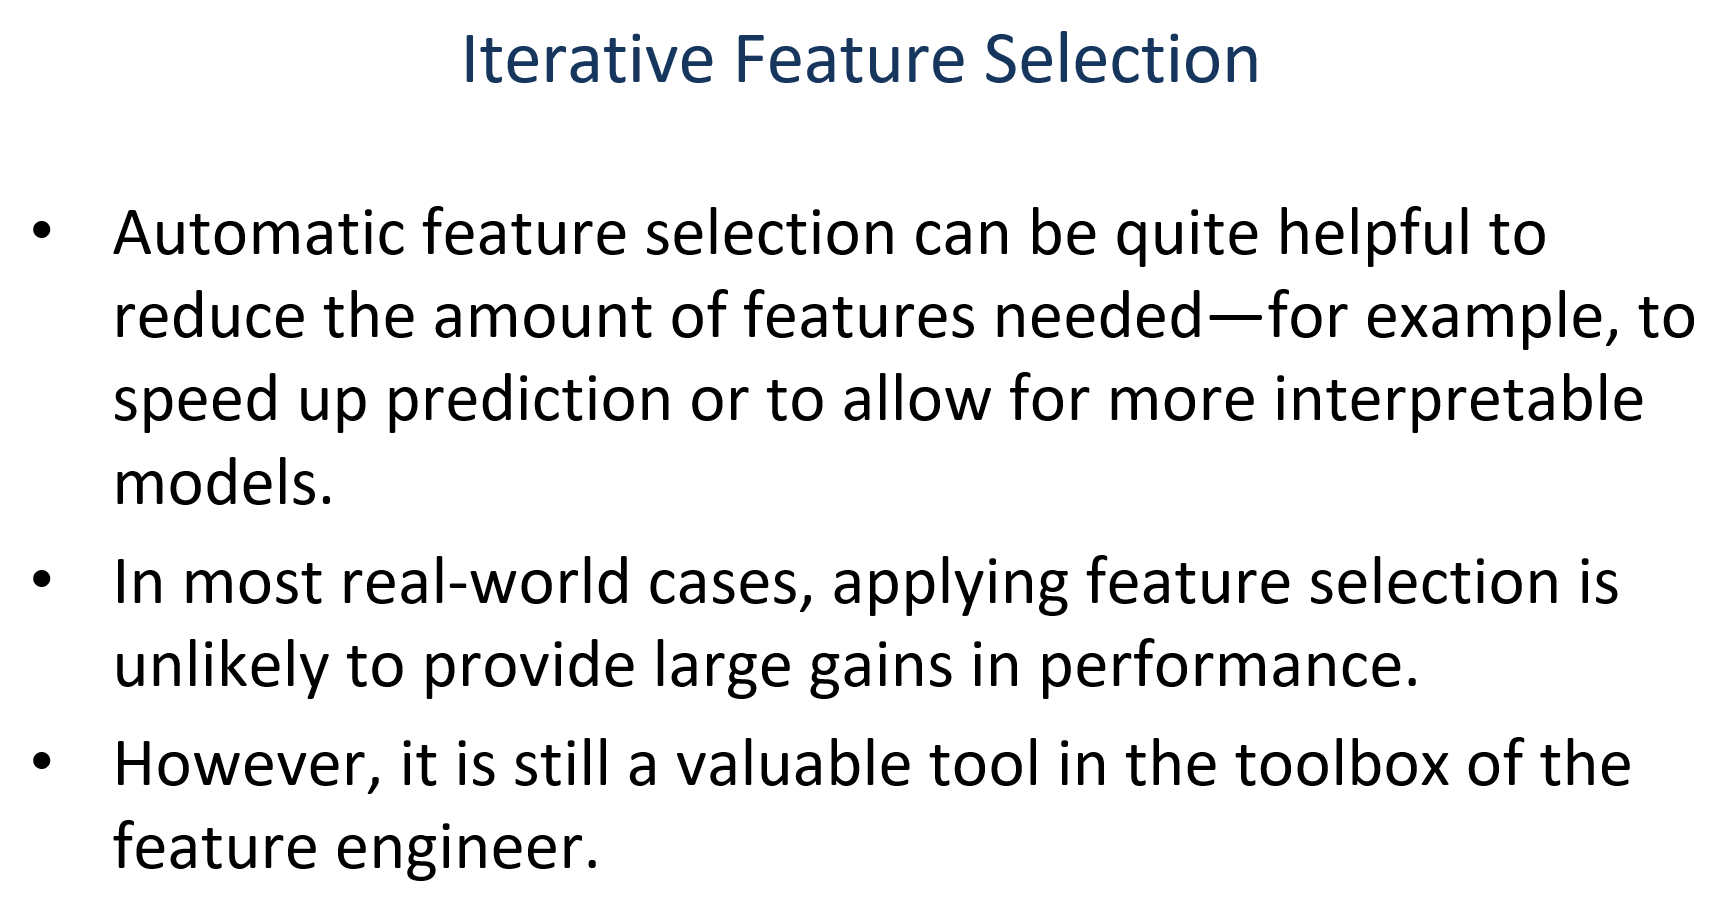

Text(0.5, 0, 'Sample index')

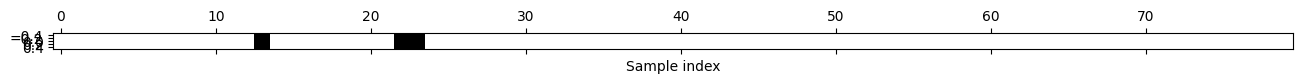

In [21]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

select = RFE(Lasso(alpha=1),
             n_features_to_select=3)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [22]:
print(select.estimator_.coef_.shape)
print(select.estimator_.coef_)


(3,)
[ 0.00017586 -0.00581895 -0.00025733]


In [23]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)

score = LogisticRegression(max_iter=10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(X_train_rfe.shape)
print("Test score: {:.3f}".format(score))

(284, 3)
Test score: 0.933


In [24]:
print("Test score: {:.3f}".format(LogisticRegression(max_iter=10000).fit(X_train, y_train).score(X_test, y_test)))

Test score: 0.947


#Dimensionality Reduction

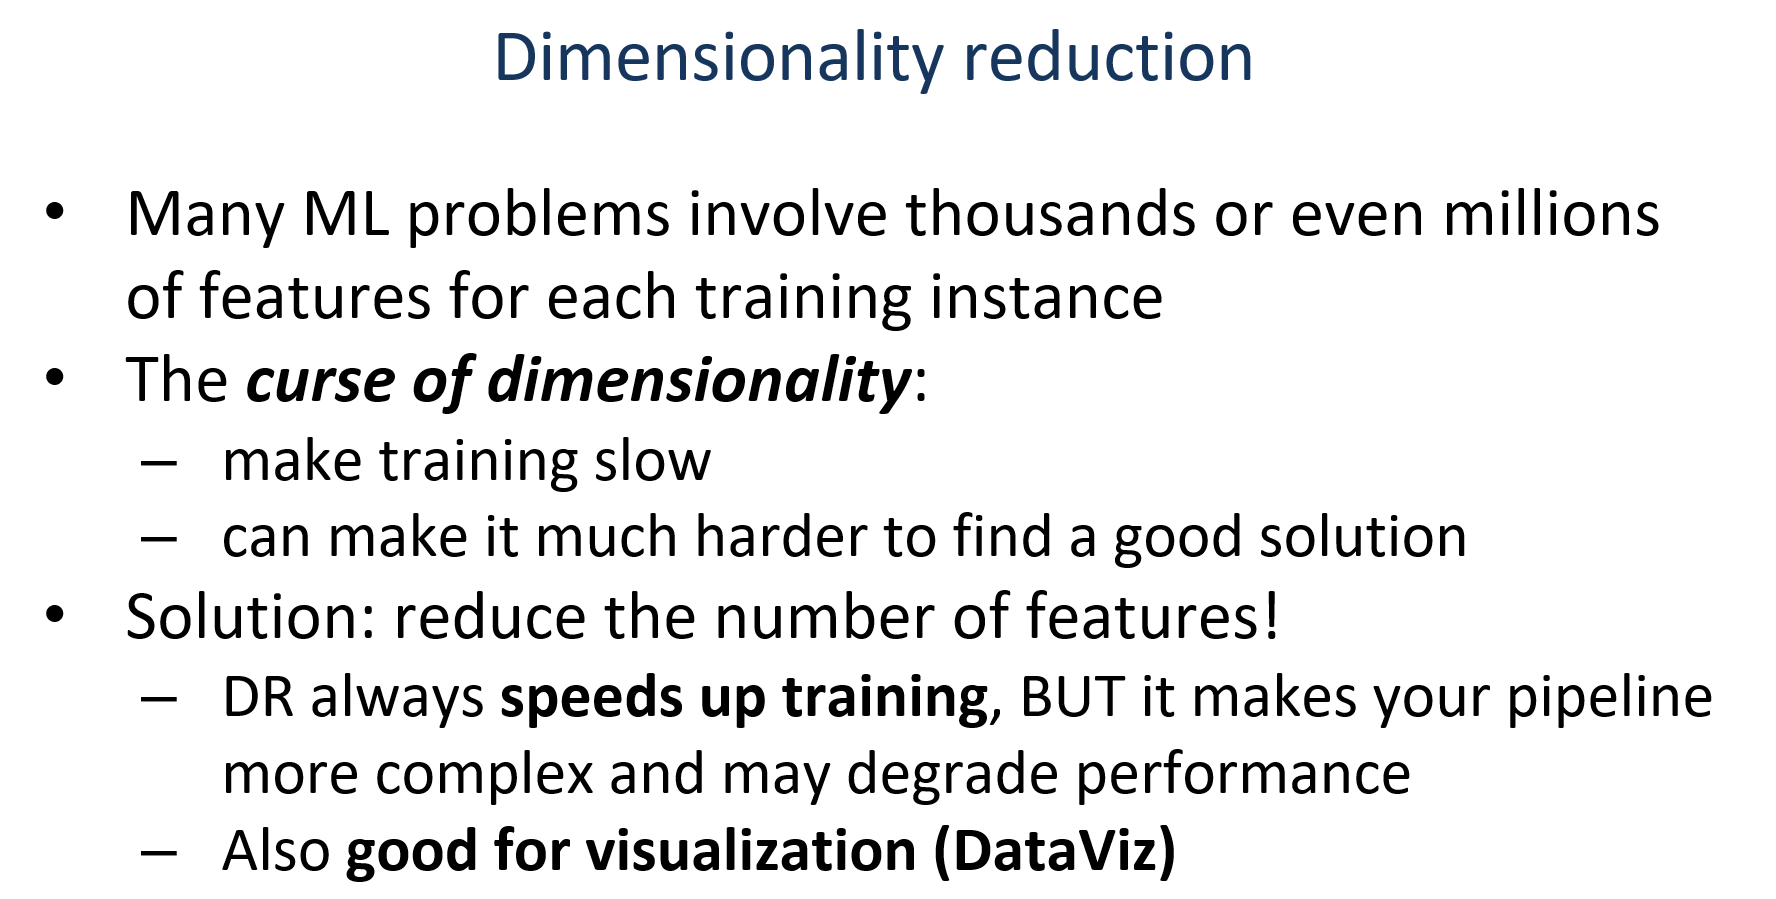

## Principal Component Analysis (PCA)

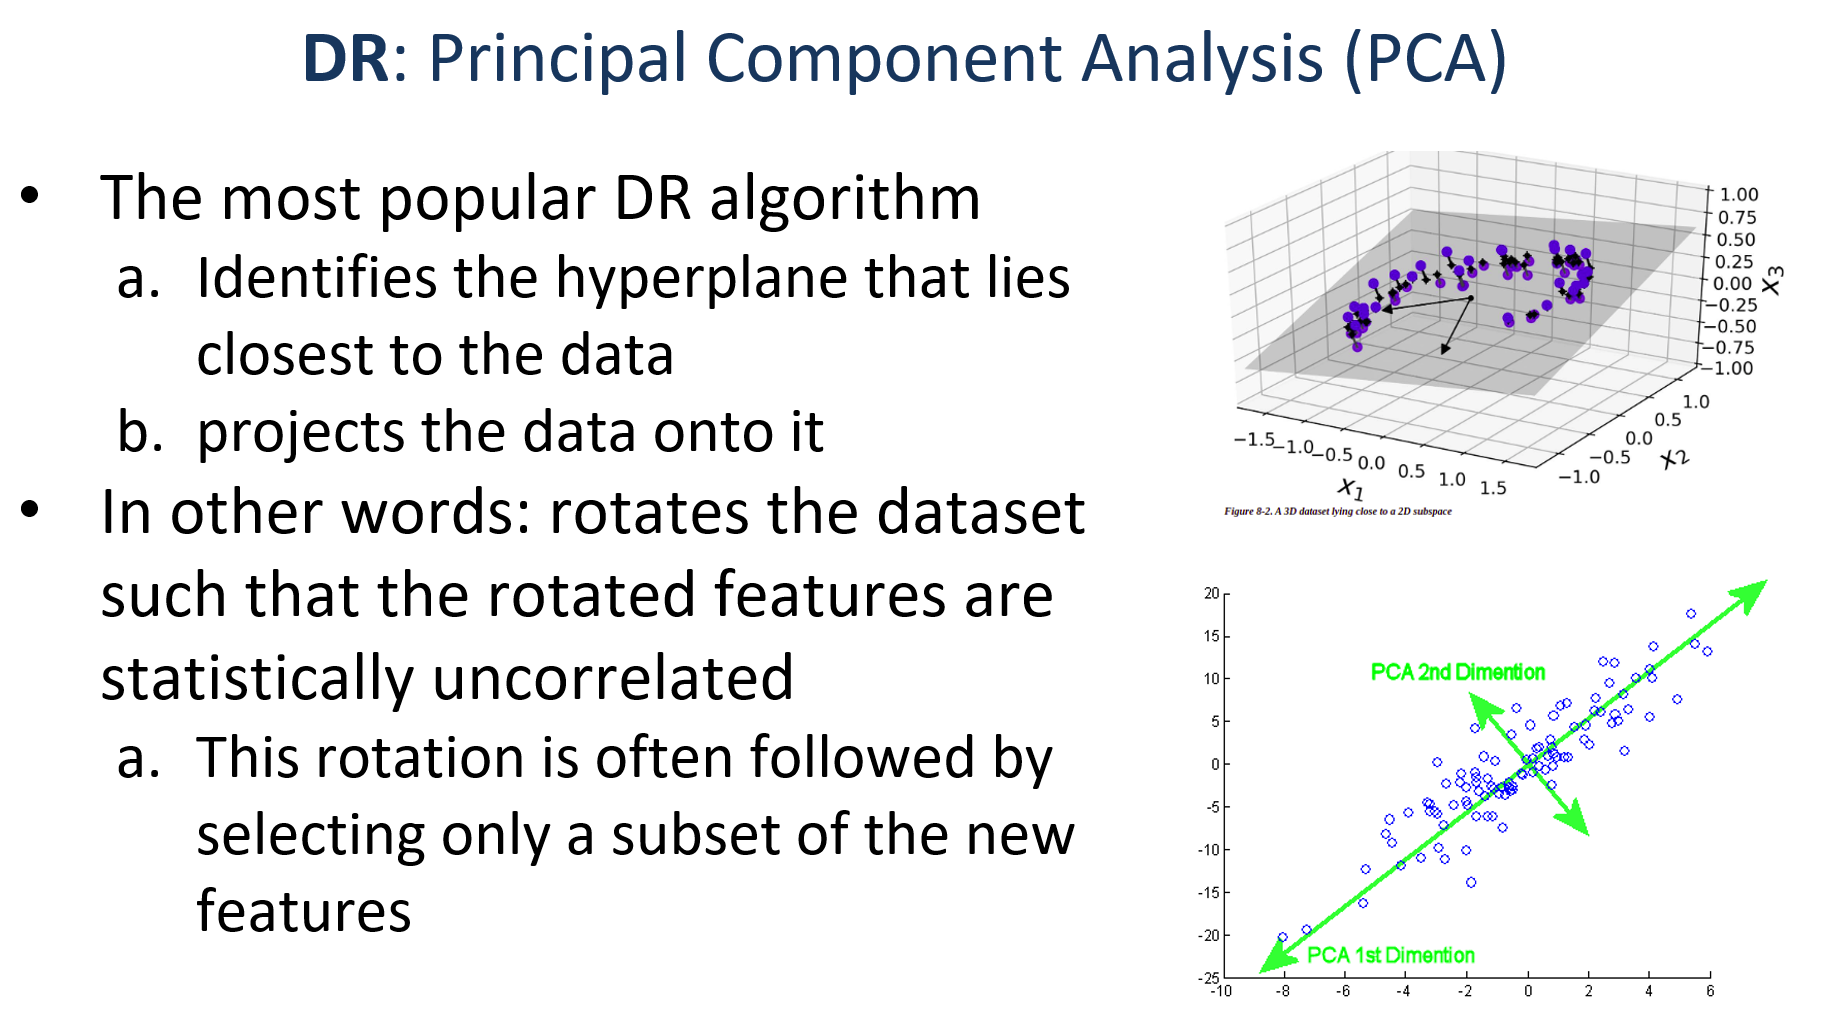

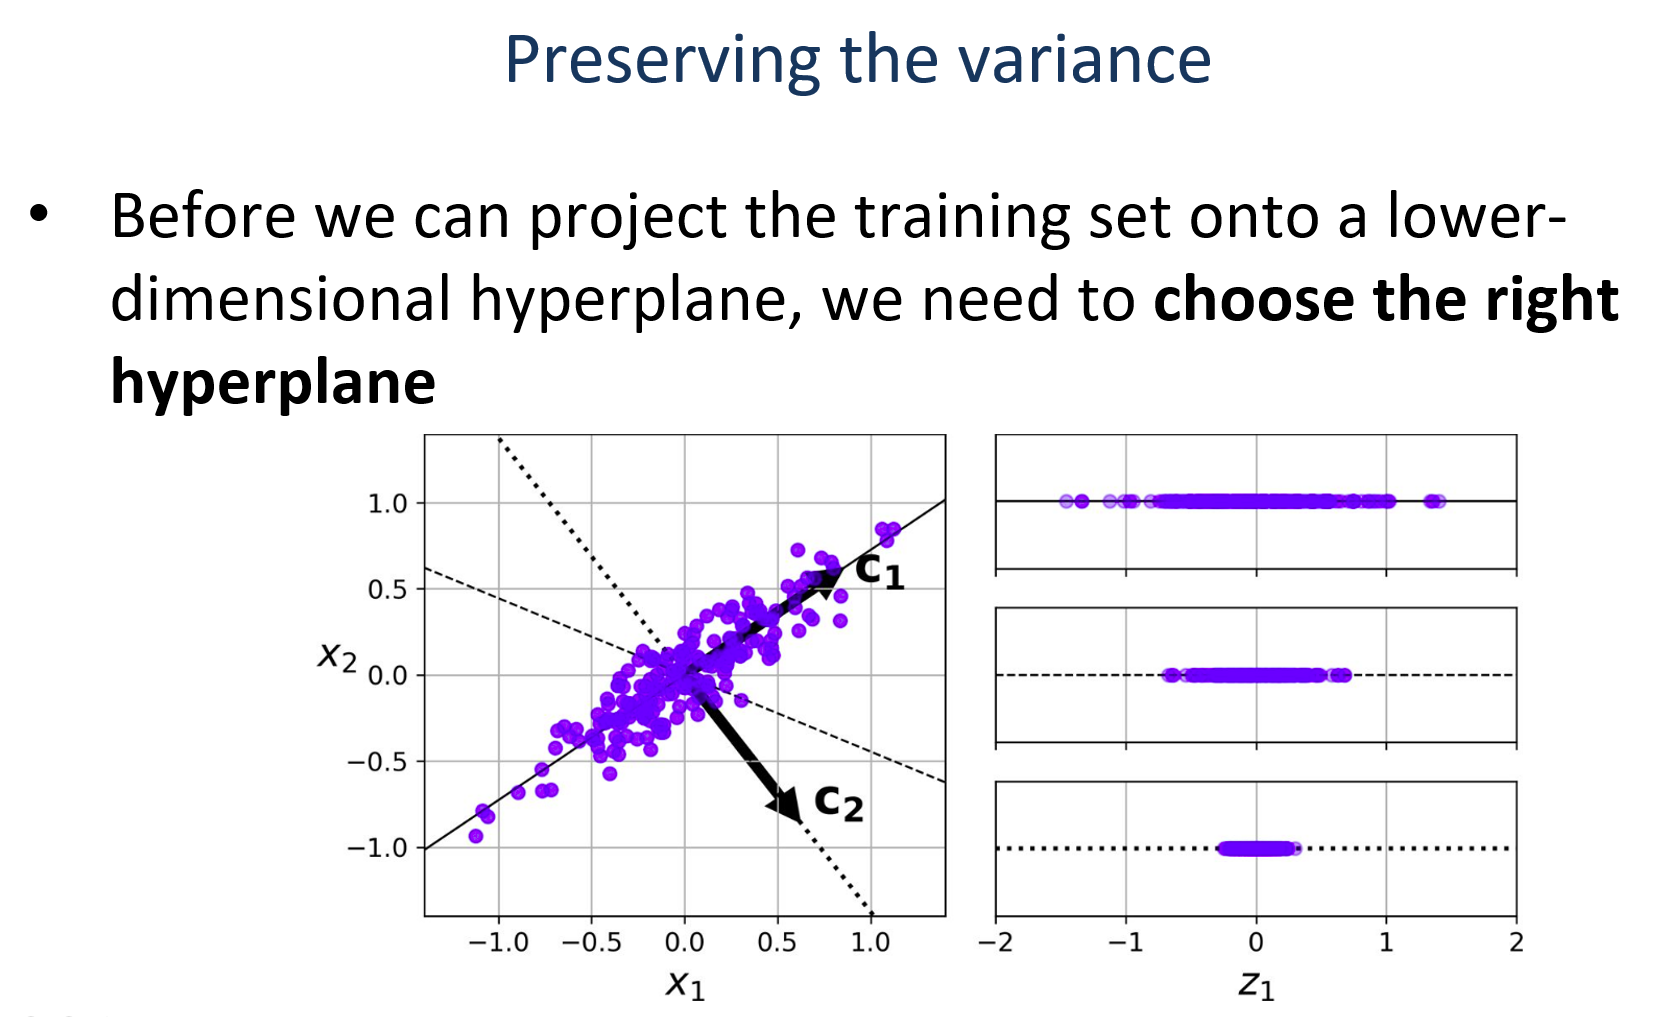

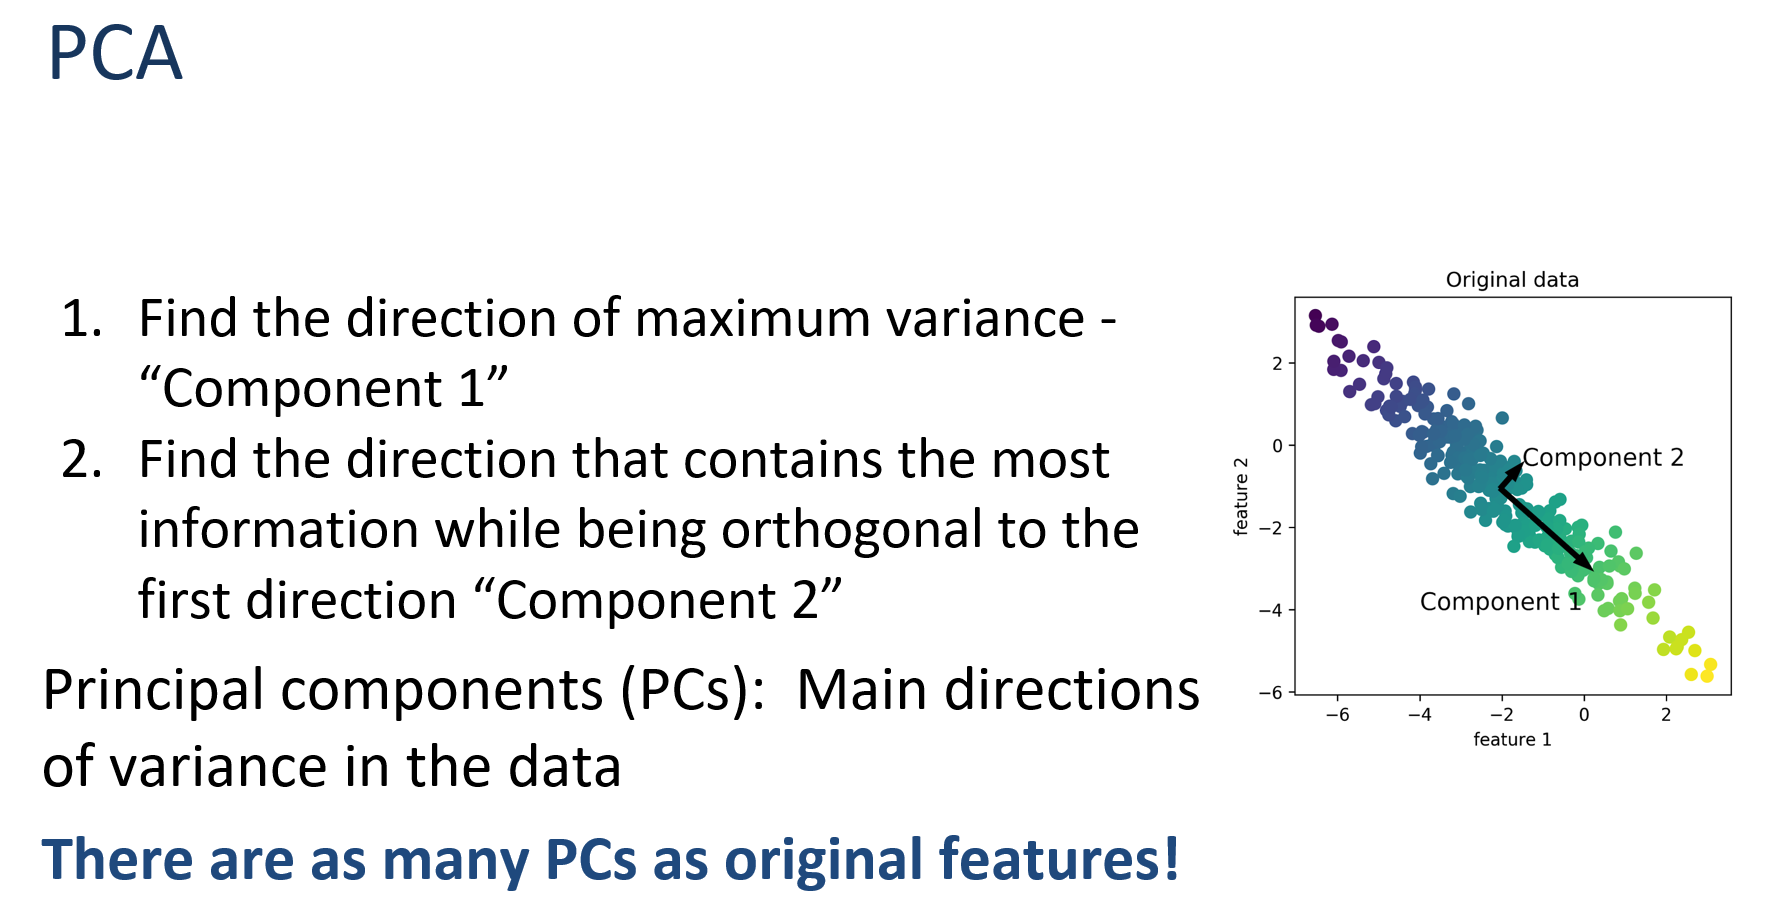

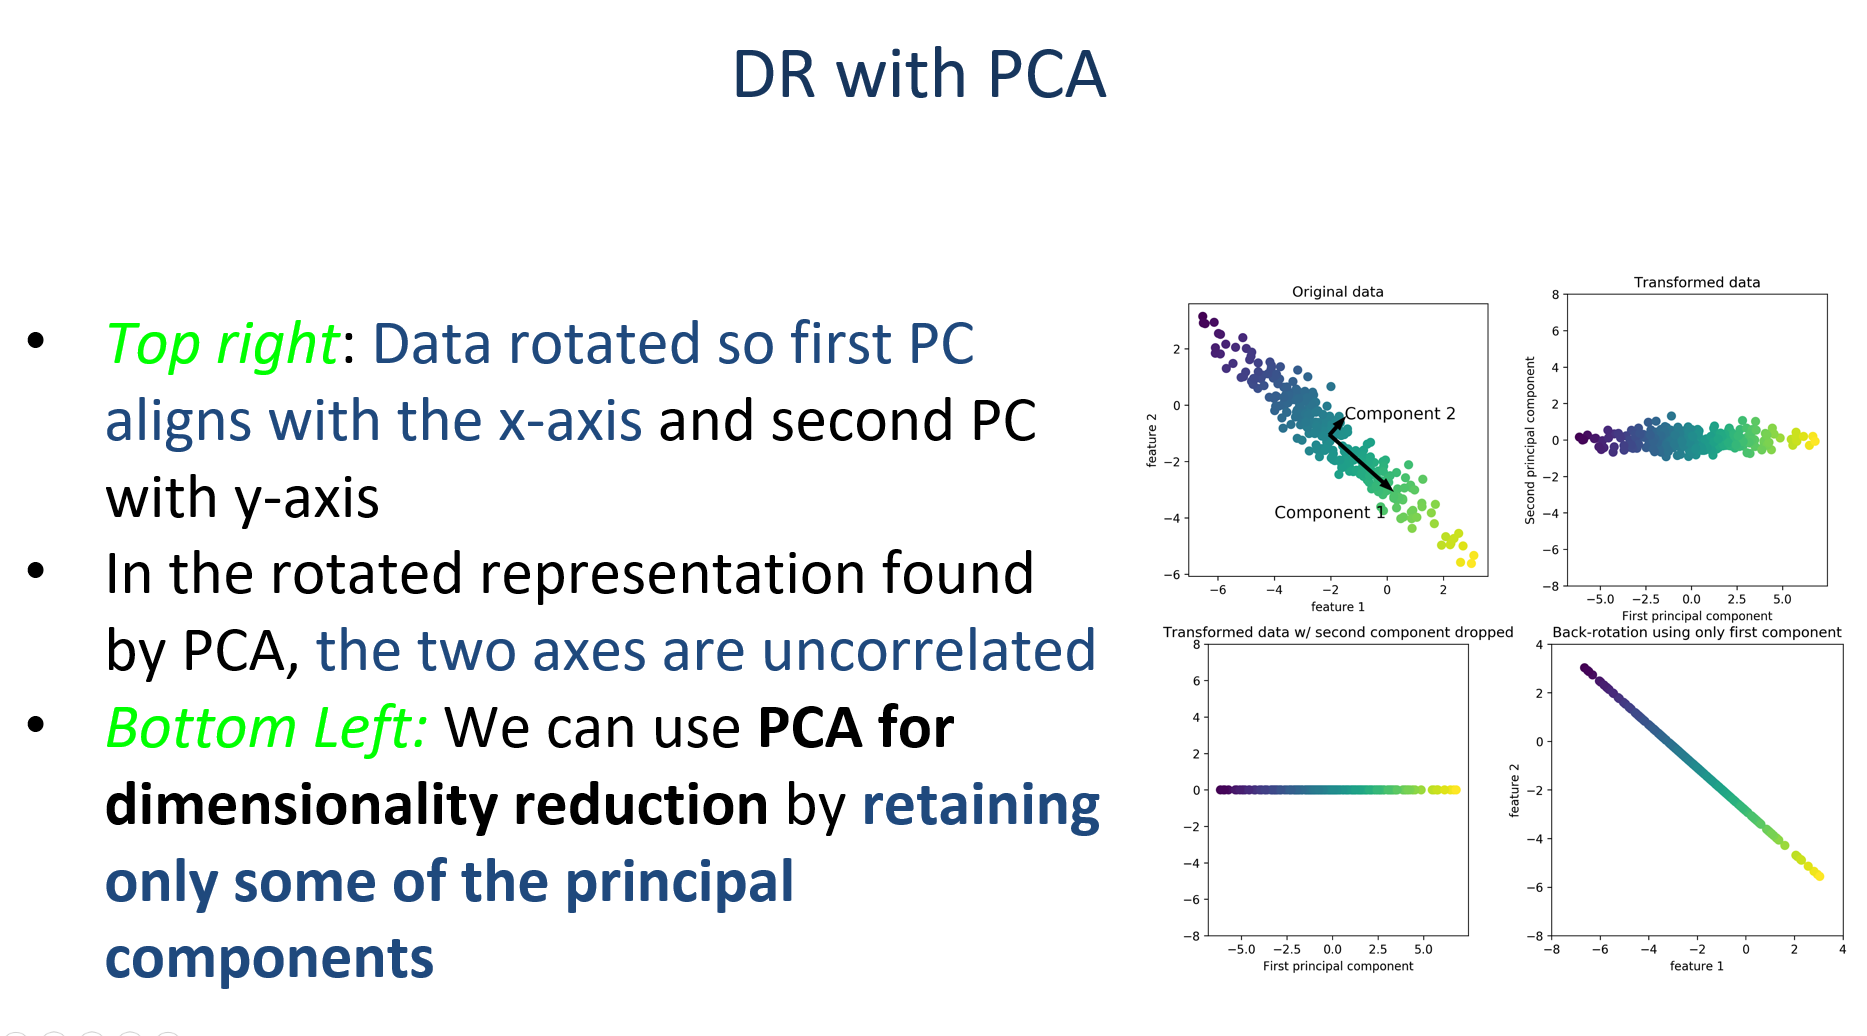

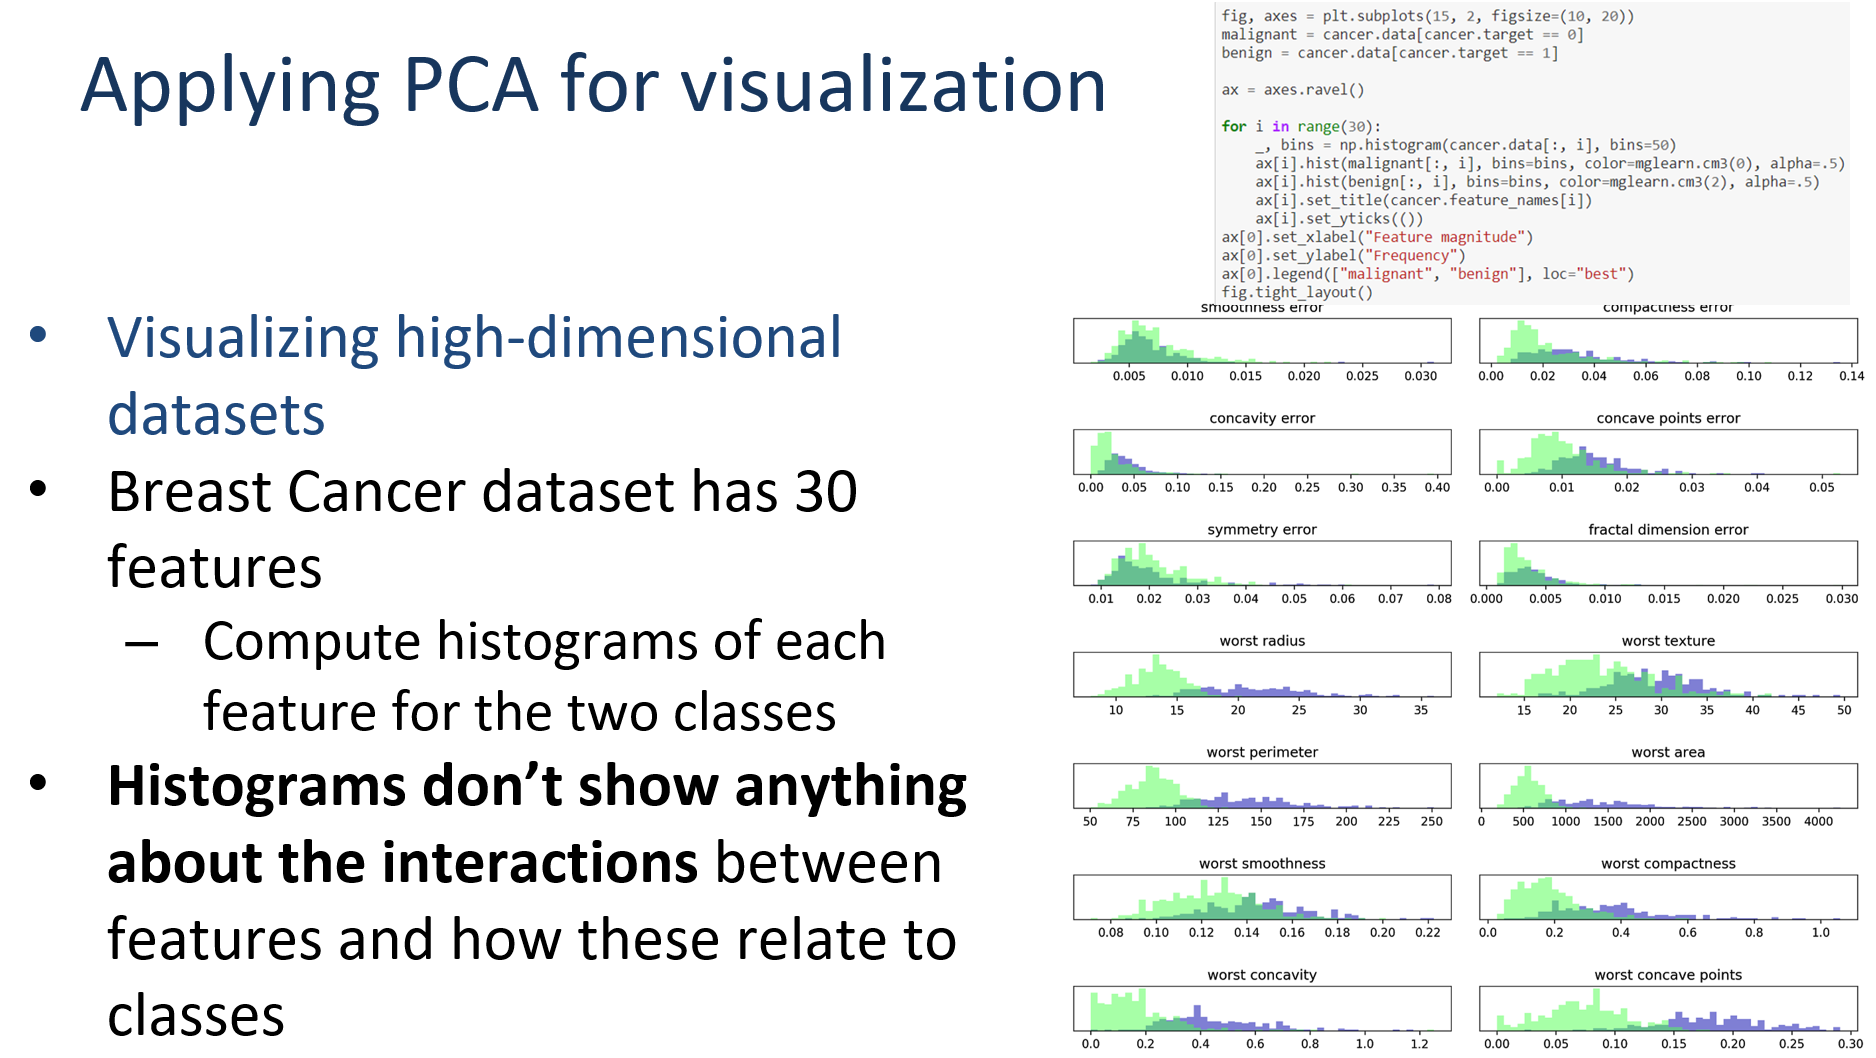

In [25]:
f_names=[*cancer.feature_names, *np.full(50, 'Noise')]

80


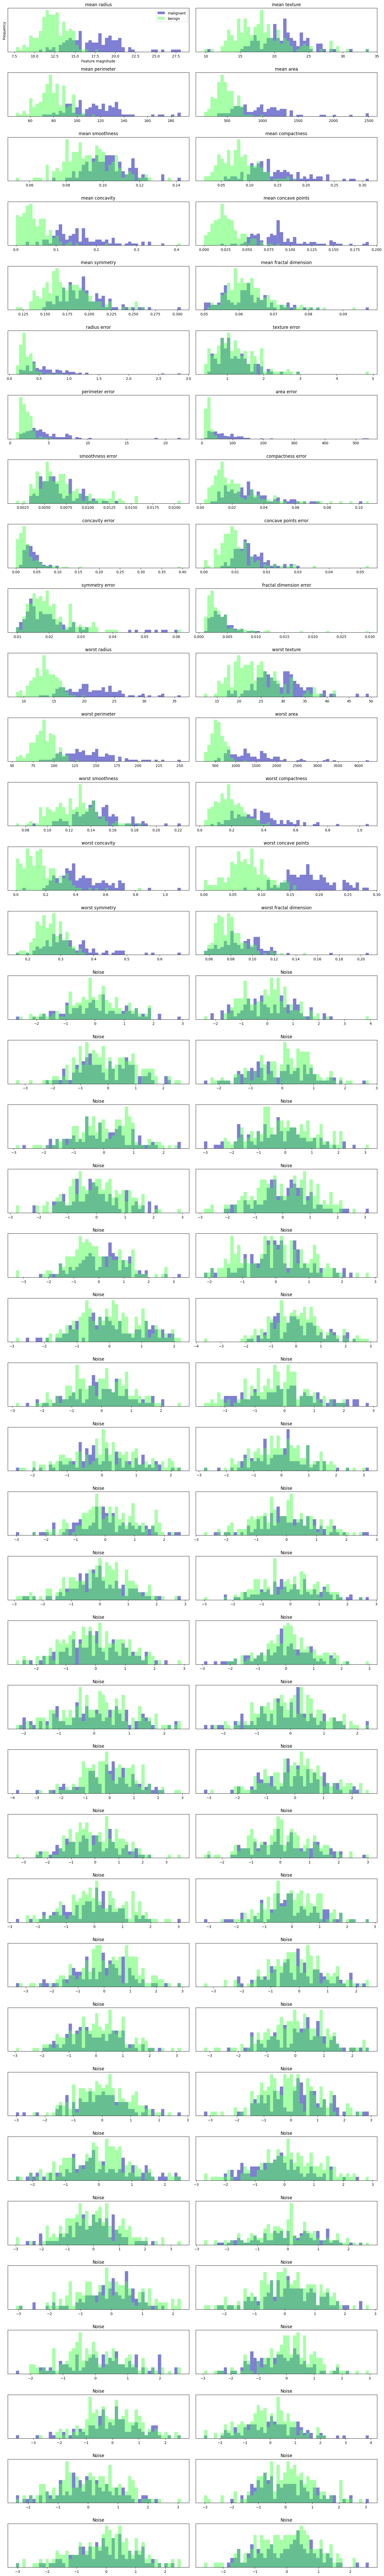

In [26]:
malignant = X_train[y_train == 0]
benign = X_train[y_train == 1]
print(X_train.shape[1])
fig, axes = plt.subplots(X_train.shape[1]//2, 2, figsize=(15, 100))
ax = axes.ravel()

for i in range(X_train.shape[1]):
    _, bins = np.histogram(X_train[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=cm3(2), alpha=.5)
    ax[i].set_title(f_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()


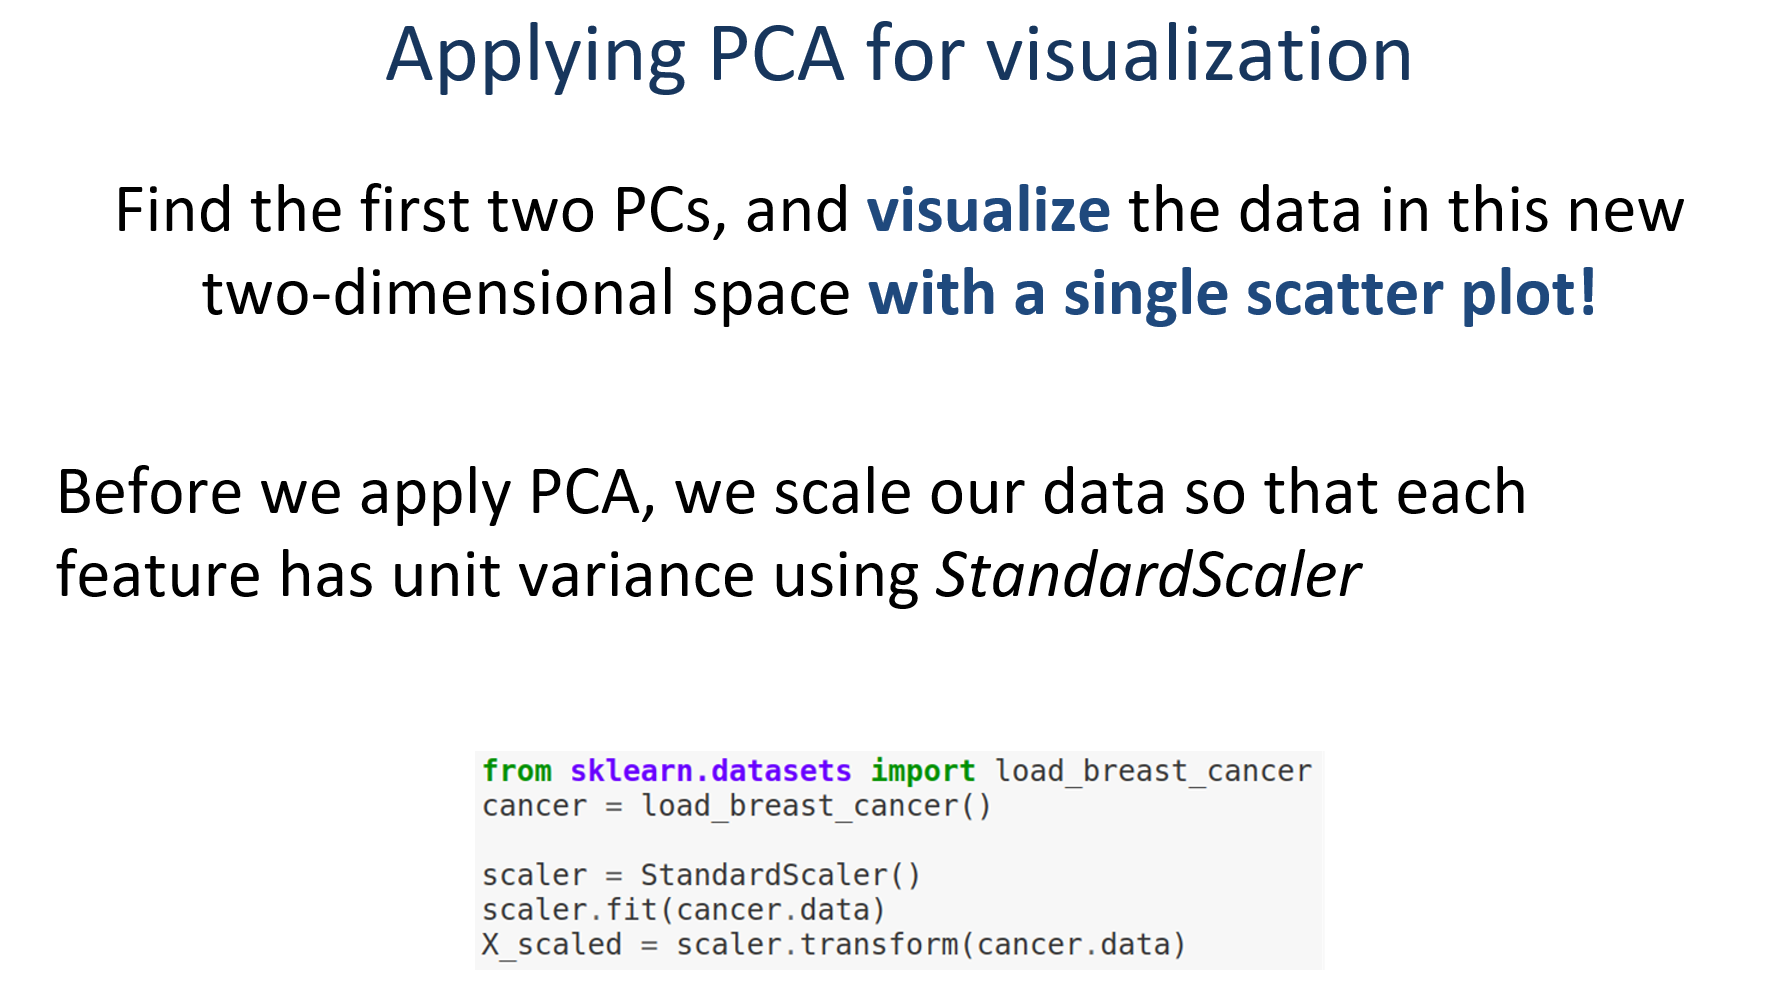

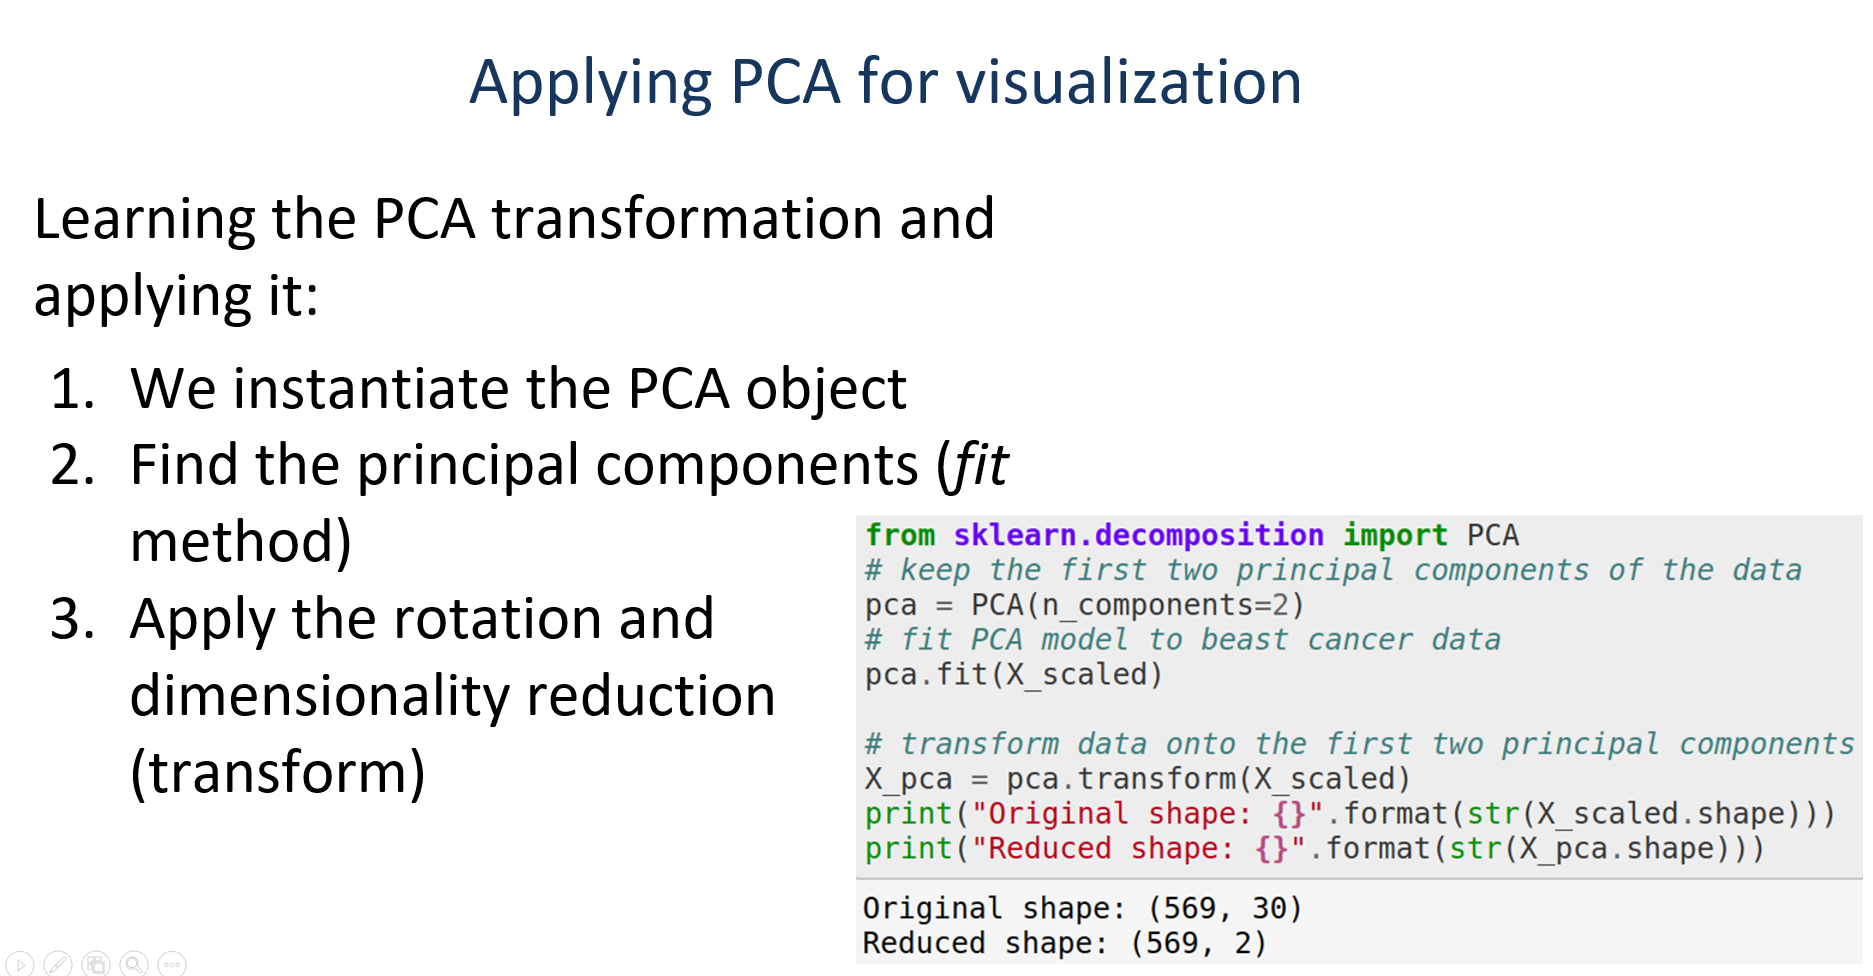

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_train_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_train_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (284, 80)
Reduced shape: (284, 2)


In [30]:
pca.explained_variance_ratio_

array([0.16260582, 0.07722499])

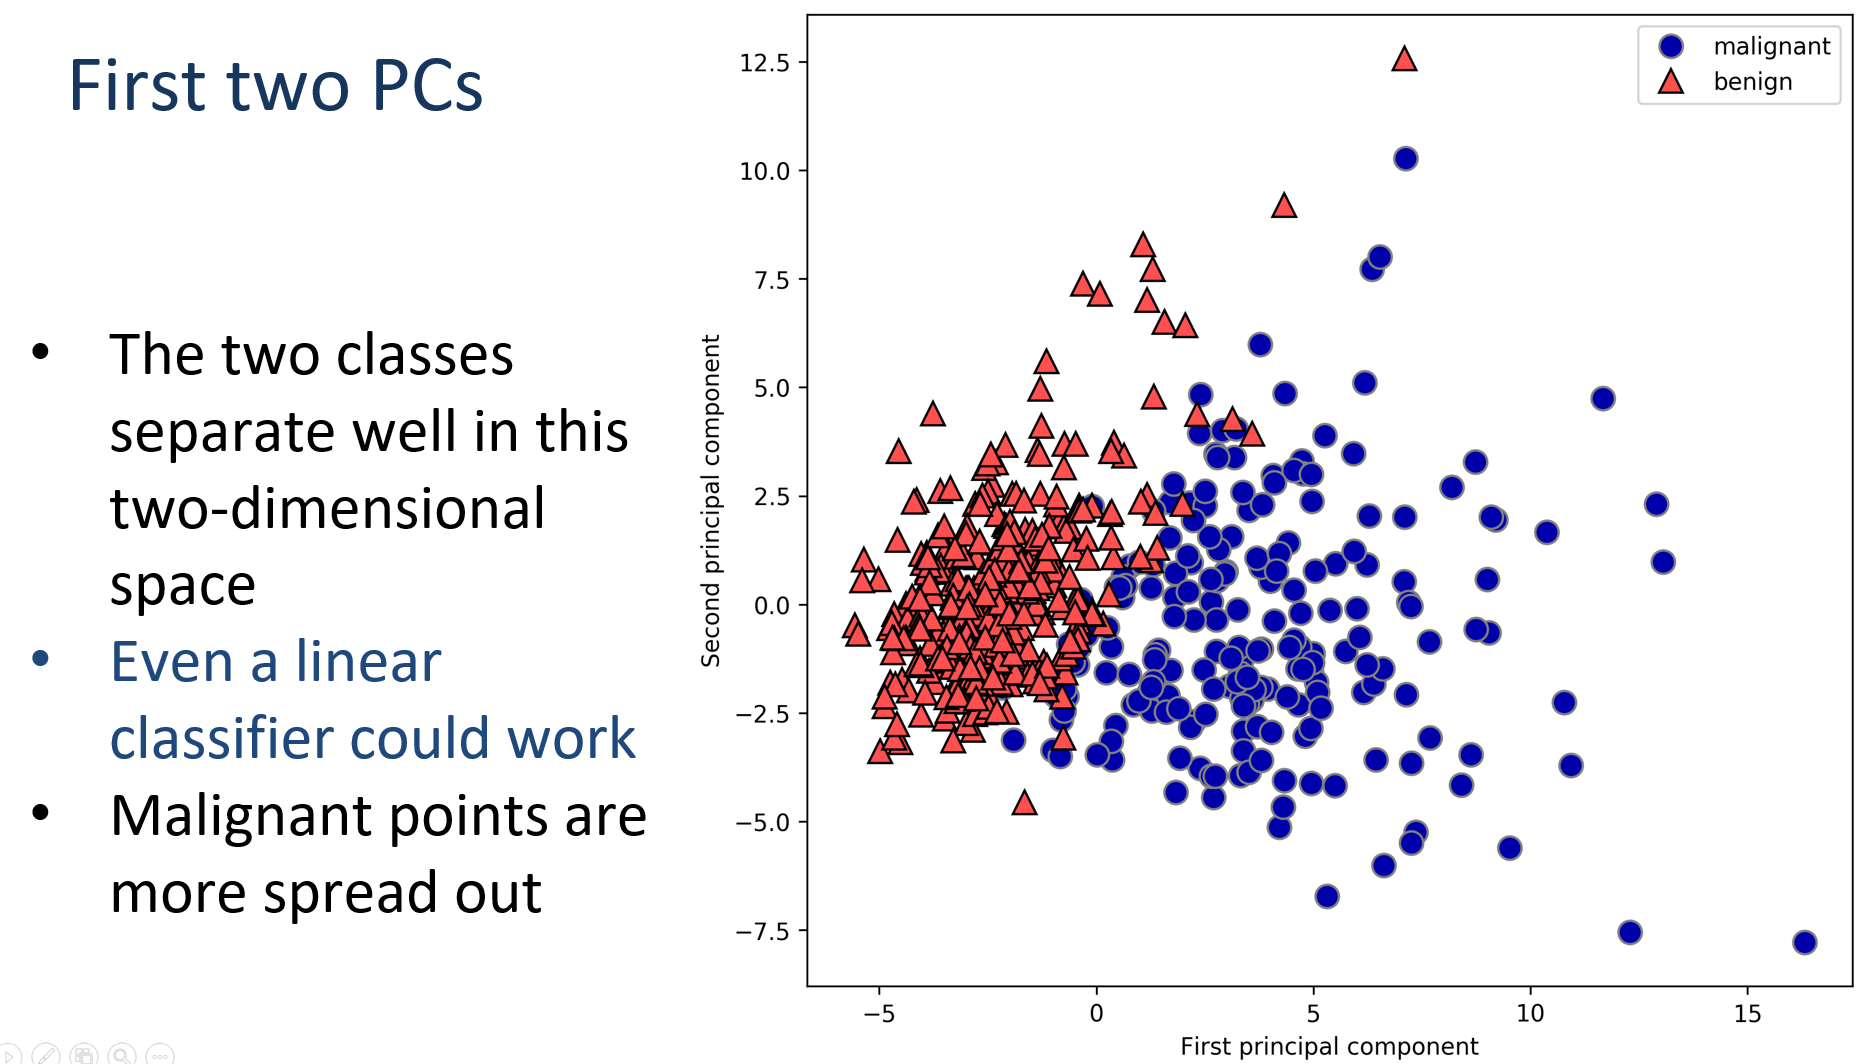

Text(0, 0.5, 'Second principal component')

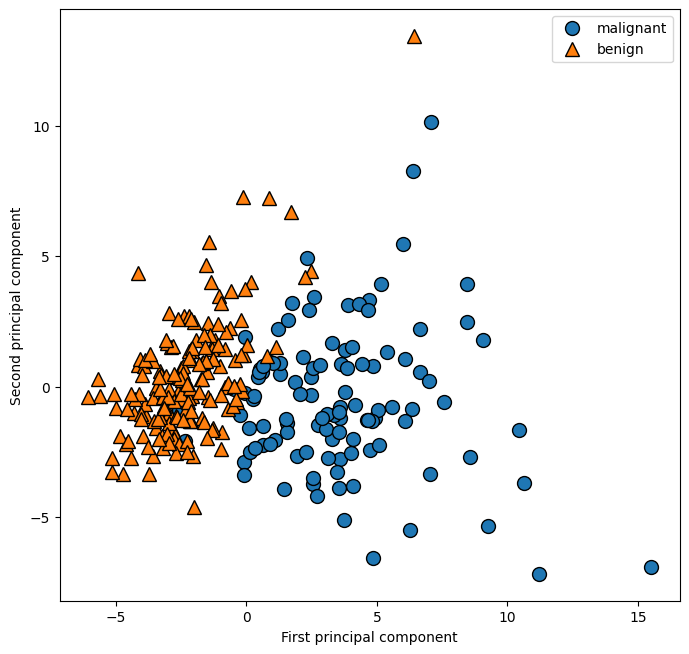

In [31]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_train)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

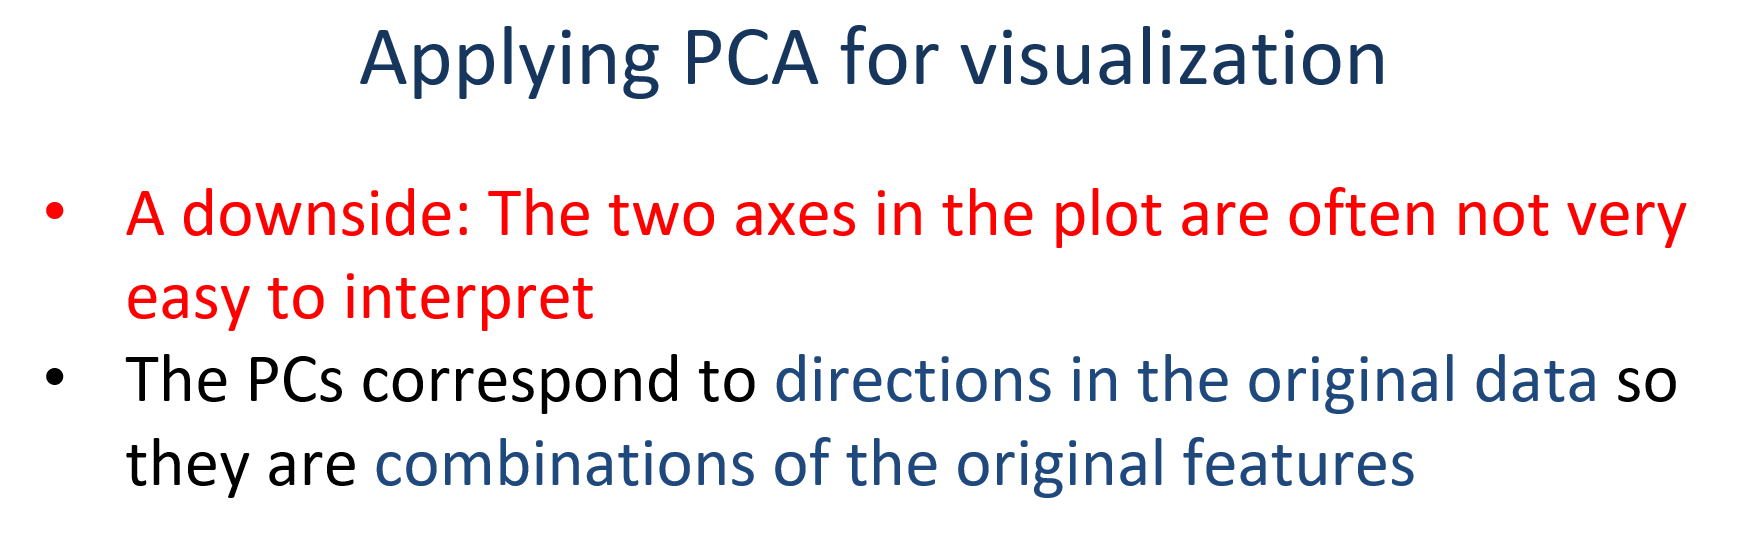

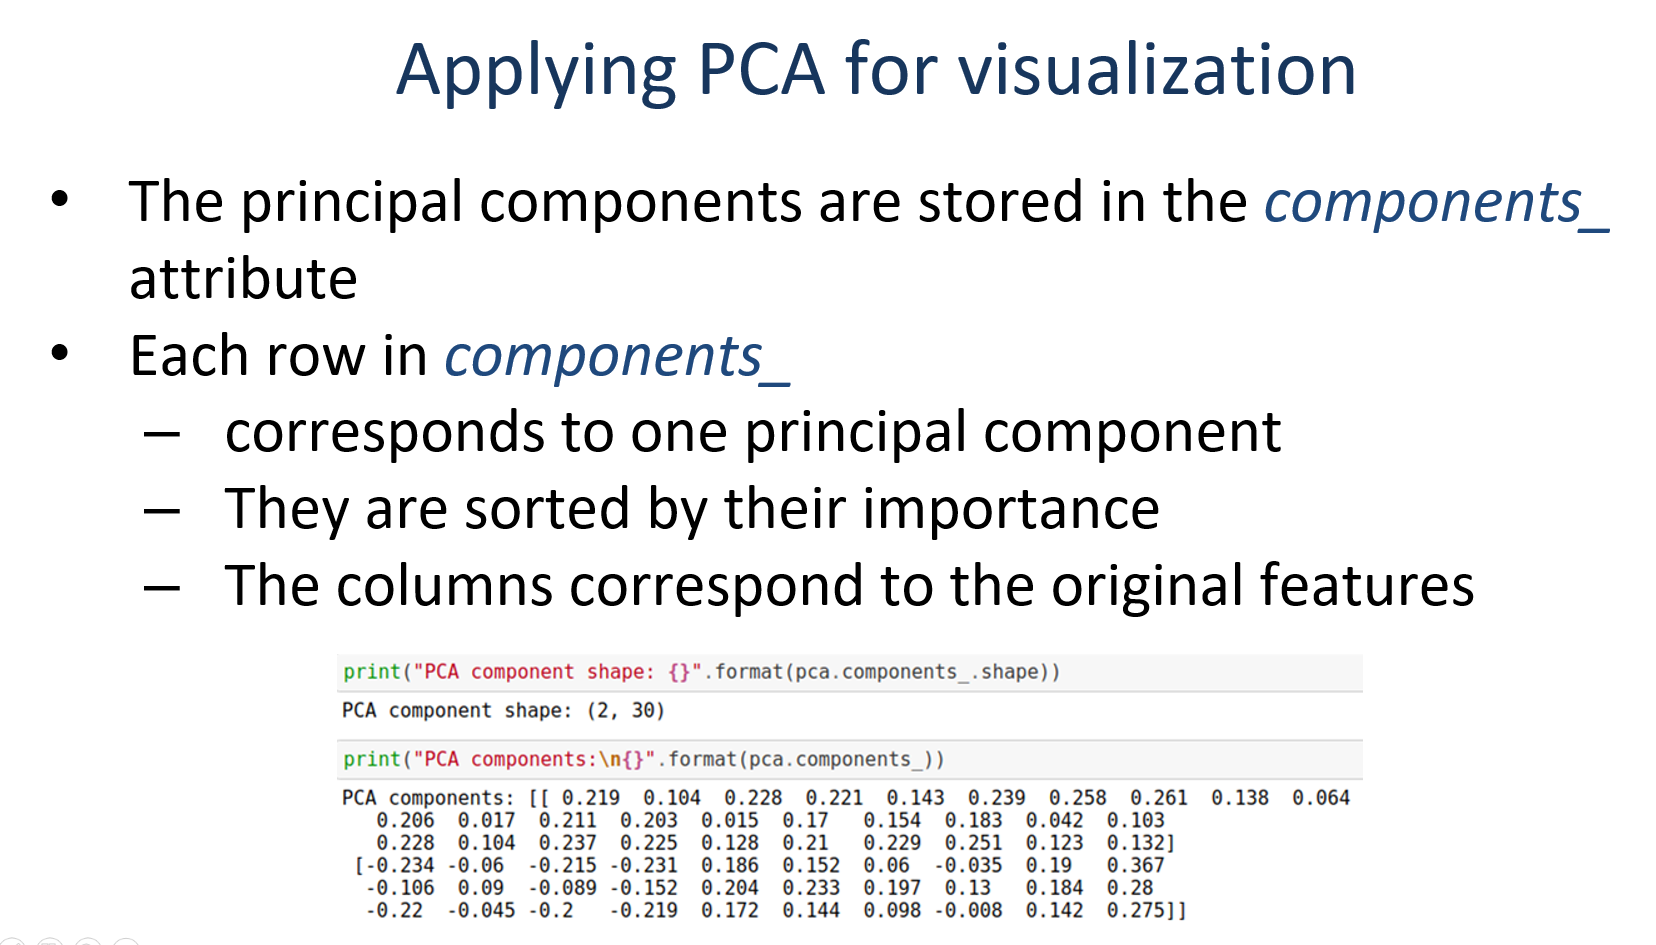

In [32]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 80)


In [33]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21806929  0.0991929   0.2264322   0.21980754  0.14333965  0.24210517
   0.26106105  0.26301508  0.13084831  0.05931696  0.2083108   0.00596102
   0.21102383  0.19833025  0.01593349  0.15504952  0.13108589  0.17187769
   0.03184449  0.09178459  0.22997626  0.10141492  0.23725338  0.22645076
   0.13344434  0.20930002  0.2298717   0.25492592  0.11918208  0.12713254
   0.01431068  0.00674596  0.00906111 -0.01419004 -0.01069787 -0.04280782
   0.00969199  0.01046866  0.00621359  0.00660637  0.01375015 -0.00796712
  -0.00707175  0.03033192 -0.0098521  -0.01995611 -0.01857367  0.01706571
   0.00479396  0.01054293 -0.00867806 -0.03698374 -0.00996105 -0.0222776
   0.00206312 -0.00788769 -0.02491572  0.02103252 -0.03509493  0.00317078
  -0.01715652  0.00945833 -0.0127756   0.02017241 -0.01371874  0.01050793
   0.00678627 -0.04609119 -0.00433582  0.00548879  0.01470302  0.01926664
   0.02883521 -0.03676926 -0.02731953  0.02177138 -0.01603397  0.00340787
  -0.00617267 -0.012202

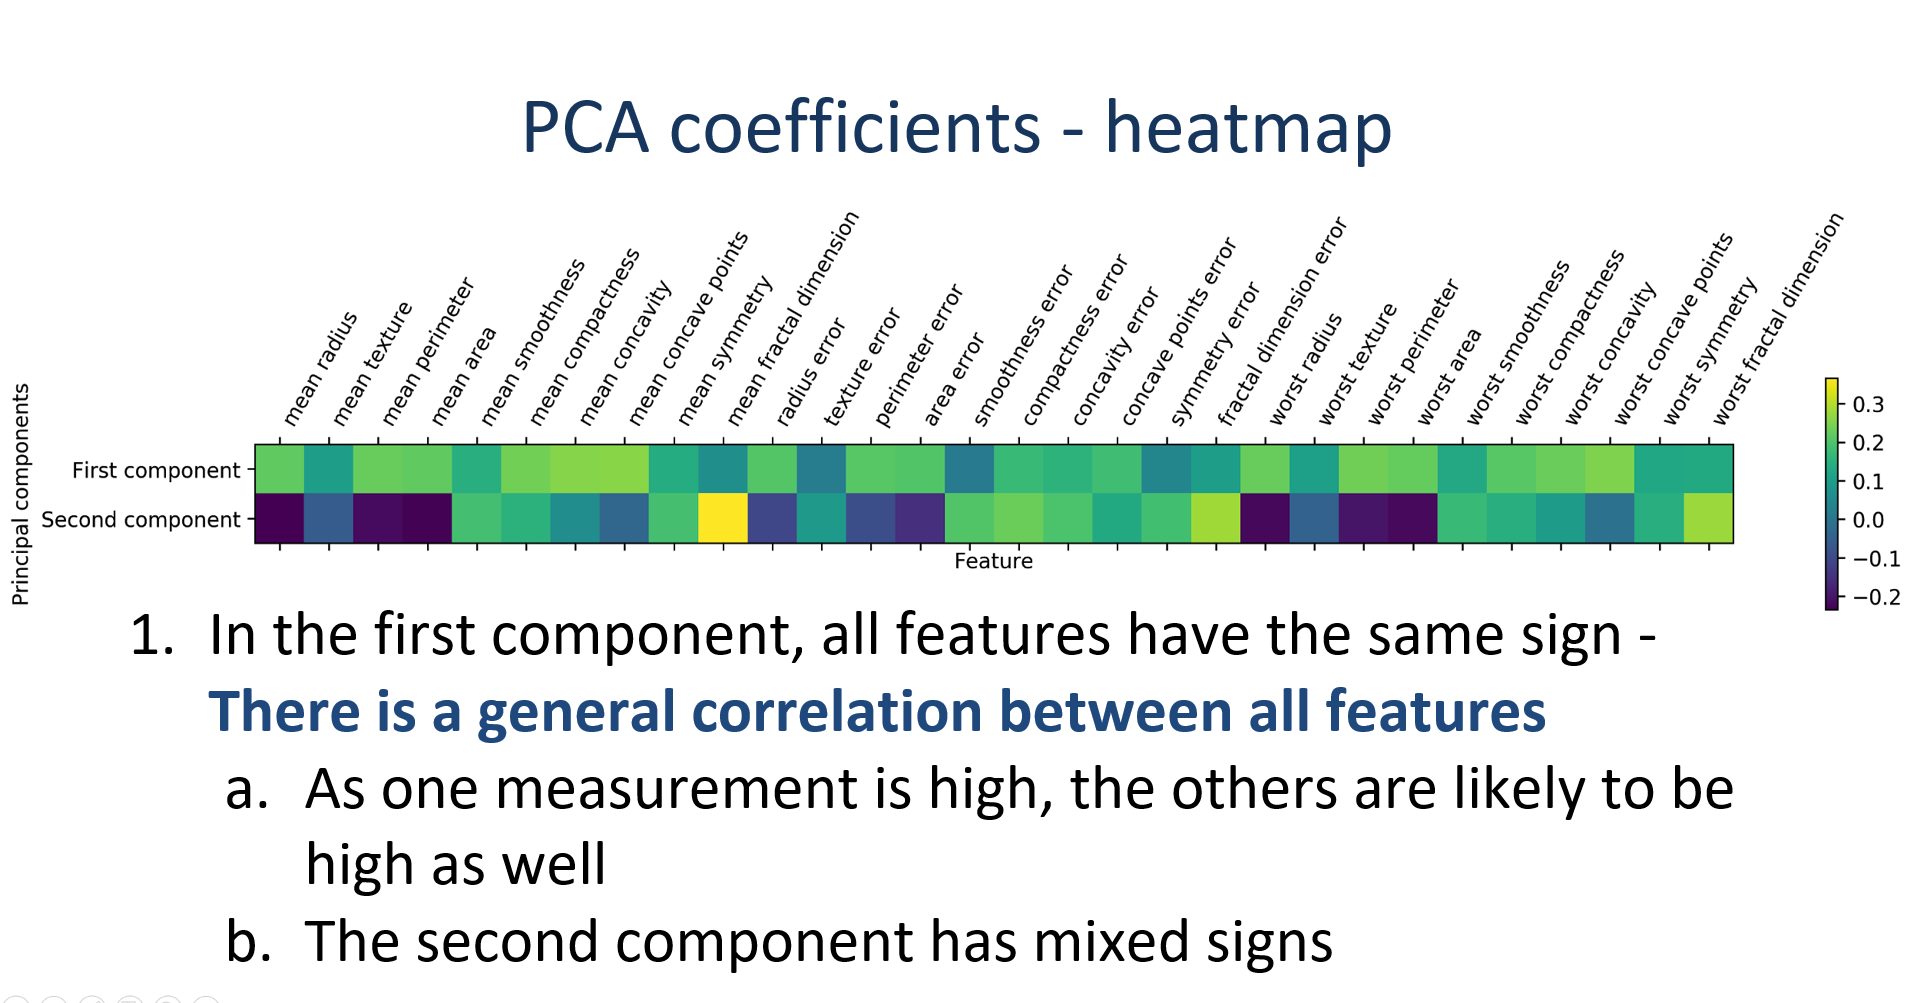

Text(0, 0.5, 'Principal components')

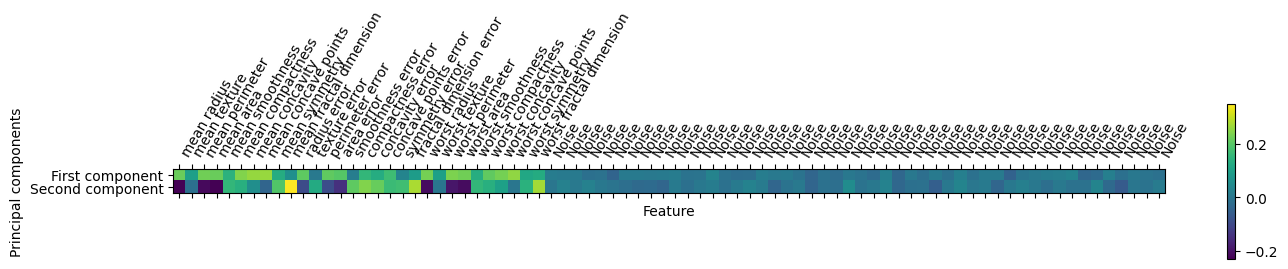

In [34]:
plt.rcParams['figure.figsize'] = [30,3]
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(f_names)),
           f_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [35]:
X_pca = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)
logreg = LogisticRegression( solver='liblinear').fit(X_pca, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_pca, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_pca_test, y_test)))


Training set score: 0.961
Test set score: 0.944


Original shape: (284, 80)
Reduced shape: (284, 2)
PCA component shape: (2, 80)
PCA components:
[[ 0.21806929  0.0991929   0.2264322   0.21980754  0.14333965  0.24210517
   0.26106105  0.26301508  0.13084831  0.05931696  0.2083108   0.00596102
   0.21102383  0.19833025  0.01593349  0.15504952  0.13108589  0.17187769
   0.03184449  0.09178459  0.22997626  0.10141492  0.23725338  0.22645076
   0.13344434  0.20930002  0.2298717   0.25492592  0.11918208  0.12713254
   0.01431068  0.00674596  0.00906111 -0.01419004 -0.01069787 -0.04280782
   0.00969199  0.01046866  0.00621359  0.00660637  0.01375015 -0.00796712
  -0.00707175  0.03033192 -0.0098521  -0.01995611 -0.01857367  0.01706571
   0.00479396  0.01054293 -0.00867806 -0.03698374 -0.00996105 -0.0222776
   0.00206312 -0.00788769 -0.02491572  0.02103252 -0.03509493  0.00317078
  -0.01715652  0.00945833 -0.0127756   0.02017241 -0.01371874  0.01050793
   0.00678627 -0.04609119 -0.00433582  0.00548879  0.01470302  0.01926664
   0.02883521 -0.0

Text(0, 0.5, 'Principal components')

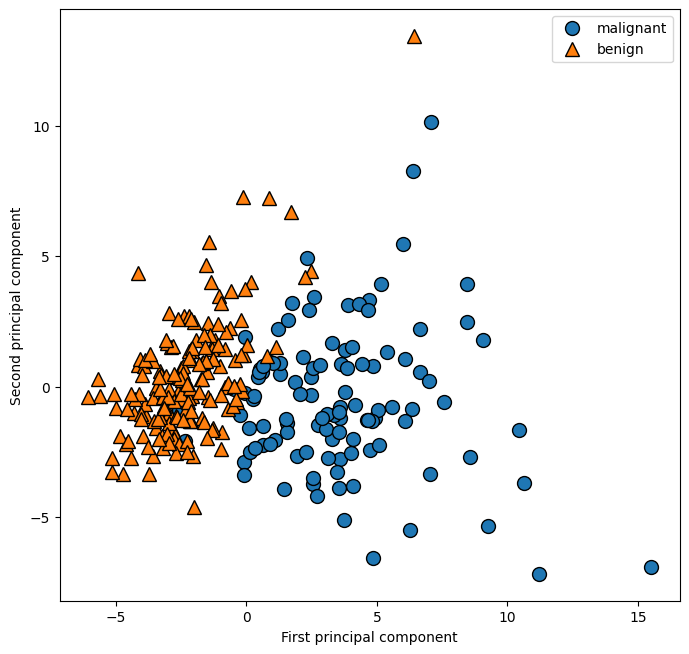

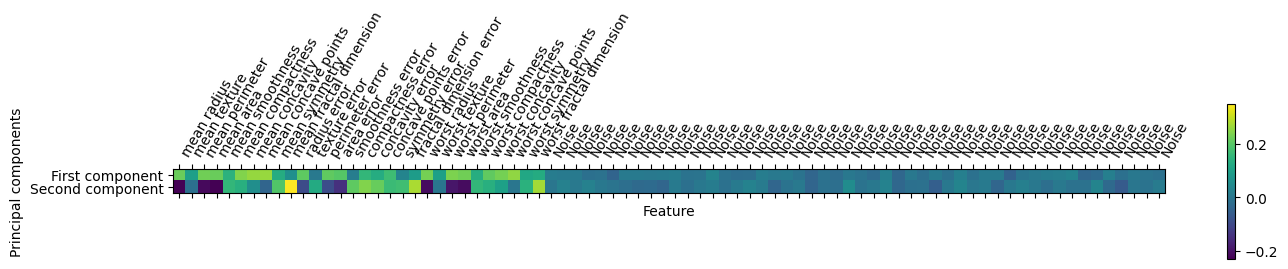

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_train_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_train_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_train)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

plt.rcParams['figure.figsize'] = [30,3]
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(f_names)),
           f_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")



## Singular Value Decomposition (SVD)

The Singular-Value Decomposition is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations
simpler.

$A=U ·Σ·V^{T}$

Where $A$ is the real n × m matrix that we wish to decompose, U is an m × m matrix, $Σ$ is an m × n diagonal matrix, and $V^{T}$ is the $V$ transpose of an n × n matrix 

The diagonal values in the Σ matrix are known as the singular values of the original matrix A. The columns of the U matrix are called the left-singular vectors of A, and the columns
of V are called the right-singular vectors of A. The SVD is calculated via iterative numerical methods.

The SVD is used widely both in the calculation of other matrix operations, such as matrix inverse, but also as a data reduction method in machine learning. SVD can also be used in least squares linear regression, image compression, and denoising data.





Original shape: (284, 80)
Reduced shape: (284, 2)
SVD component shape: (2, 80)
SVD components:
[[ 0.21806932  0.09919287  0.22643222  0.21980754  0.1433397   0.24210516
   0.26106102  0.26301506  0.13084833  0.05931692  0.2083108   0.00596094
   0.21102382  0.19833024  0.01593351  0.15504949  0.1310859   0.17187773
   0.03184443  0.0917846   0.22997627  0.10141487  0.23725339  0.22645074
   0.13344439  0.2093      0.22987168  0.25492591  0.11918202  0.12713254
   0.01431073  0.00674582  0.00906117 -0.01418991 -0.01069803 -0.04280786
   0.00969196  0.01046837  0.00621352  0.00660623  0.01375041 -0.00796707
  -0.00707192  0.03033182 -0.00985224 -0.01995636 -0.0185739   0.01706544
   0.00479395  0.0105428  -0.0086778  -0.03698389 -0.00996126 -0.02227758
   0.00206321 -0.00788751 -0.02491607  0.02103235 -0.03509509  0.00317096
  -0.01715646  0.00945816 -0.01277544  0.02017245 -0.01371878  0.01050778
   0.00678649 -0.04609143 -0.00433595  0.00548858  0.01470305  0.01926658
   0.02883513 -0.

Text(0, 0.5, 'Singular values')

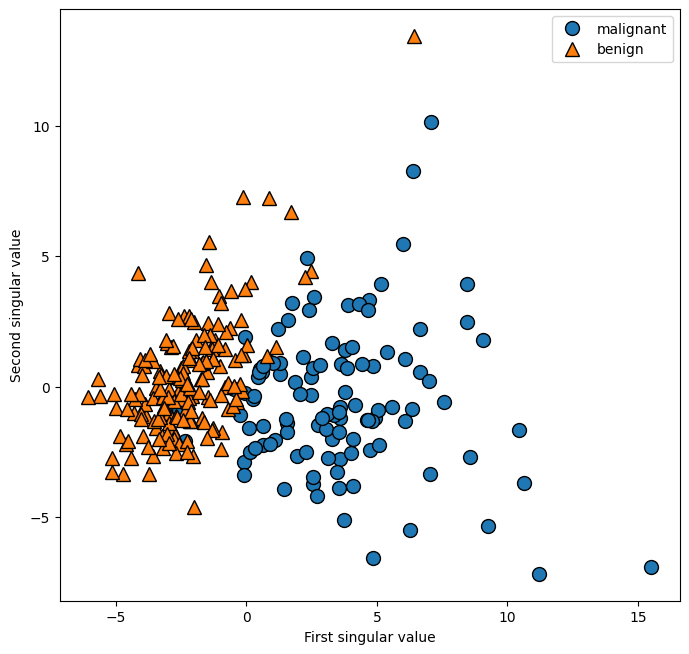

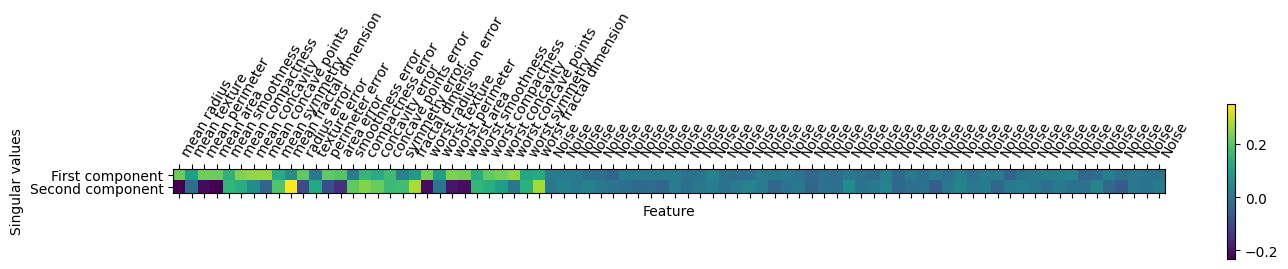

In [37]:
from sklearn.decomposition import TruncatedSVD

# keep the first two singular values of the data
svd = TruncatedSVD(n_components=2)
# fit SVD model to breast cancer data
svd.fit(X_train_scaled)

# transform data onto the first two singular values
X_svd = svd.transform(X_train_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_svd.shape)))

# plot first vs. second singular value, colored by class
plt.figure(figsize=(8, 8))
discrete_scatter(X_svd[:, 0], X_svd[:, 1], y_train)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First singular value")
plt.ylabel("Second singular value")

print("SVD component shape: {}".format(svd.components_.shape))
print("SVD components:\n{}".format(svd.components_))

plt.rcParams['figure.figsize'] = [30,3]
plt.matshow(svd.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(f_names)),
           f_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Singular values")